# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
!pip install black[jupyter]

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

The black module is not an IPython extension.


In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path=('/content/drive/MyDrive/Project5/EasyVisa.csv')
EasyVisa=pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
EasyV=EasyVisa.copy()

In [ ]:
EasyV.shape

(25480, 12)

#### Observations

- The Data is made up of 12 columns and 25,480 rows


In [ ]:
EasyV.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

#### Observation
- We observe the data is correctly loaded
- The 12 columns correspond to value we got using the shape function

In [ ]:
EasyV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations
- There are 9 object data types and 3 numerical types
- It appears there no missing values

In [ ]:
EasyV.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.043210  22877.928848   -26.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

#### Observations

- The minimum number of employee is -26 personnels, this might be a mistake since negative persons is not possible
- The maximum number of employees recorded is 602,069 personnels
- The average number of employees recorded is 5667 persons

- The oldest company was established in 1800, the newest company was established in 2016, on the average most companies were established in the 4th Month of 1979
- The minimum prevailing wage recorded is 2.1367 usd, the maximum recorded is 319,210.27 usd and average of 74455.814592 use, however we need to check and convert all wages to a common unit to enable proper comparison



In [ ]:
EasyV.describe(include='object').T

count unique         top   freq
case_id                25480  25480      EZYV01      1
continent              25480      6        Asia  16861
education_of_employee  25480      4  Bachelor's  10234
has_job_experience     25480      2           Y  14802
requires_job_training  25480      2           N  22525
region_of_employment   25480      5   Northeast   7195
unit_of_wage           25480      4        Year  22962
full_time_position     25480      2           Y  22773
case_status            25480      2   Certified  17018

#### Observations
- Case I'd is unique for each applicant, it will not have influence on case status
- There are 6 unique continents out of which Asia has the most applicants accounting for 16,861 cases
- There are4 unique education of employees, out of which Bachelor's level is most recorded, accounting for 10,234 cases
- There are 2 unique items associated with the column has job experience, either yes or no, where y is the most recorded, accounting for 14,802 cases
- There are 2 unique items associated with the column requires job training, either Y or N, where N is the most recorded and accounting for 22,525 cases
- There are 5 unique items associated with the column region of employment, with Northeast been most recorded and accounting for7,195 cases
- There are 4 unique items associated with the column unit of wage, year is most recorded, accounting for 22,962 cases
-There 2 unique items associated with the column full time position, either Y or N with Y been the most recorded, accounting for 22,773 cases
- There are 2 unique items associated with the column case status, either certified or denied,certified is most recorded, accounting for 17,018 cases

#### Checking for missing and duplicated values

In [ ]:
EasyV.isnull().values.any()

False

In [ ]:
EasyV.duplicated().values.any()

False

#### Observations
- Above functions confirms there are no missing values in the data as well as no duplicated records

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Understanding the number rows with negative number of employees

  - As observed that the minimum number of employees is -26 and since it should not be possible to have negative number of employees, will like to see how widespread this is and resolve.

In [ ]:
NegEmp=EasyV[EasyV['no_of_employees']<0]
NegEmp.shape

(33, 12)

#### Observations
 - 33 rows in all out of the 25480 rows have negative number of employees
 - will replace these values with their absolute values

In [ ]:
EasyV['no_of_employees'] = abs(EasyV['no_of_employees'])

In [ ]:
EasyV.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.089207  22877.917453    11.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

  - now the minimum number of employees is 11, no negatives in the data

## **Univariate** Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Understanding the distribution of no_of_employees





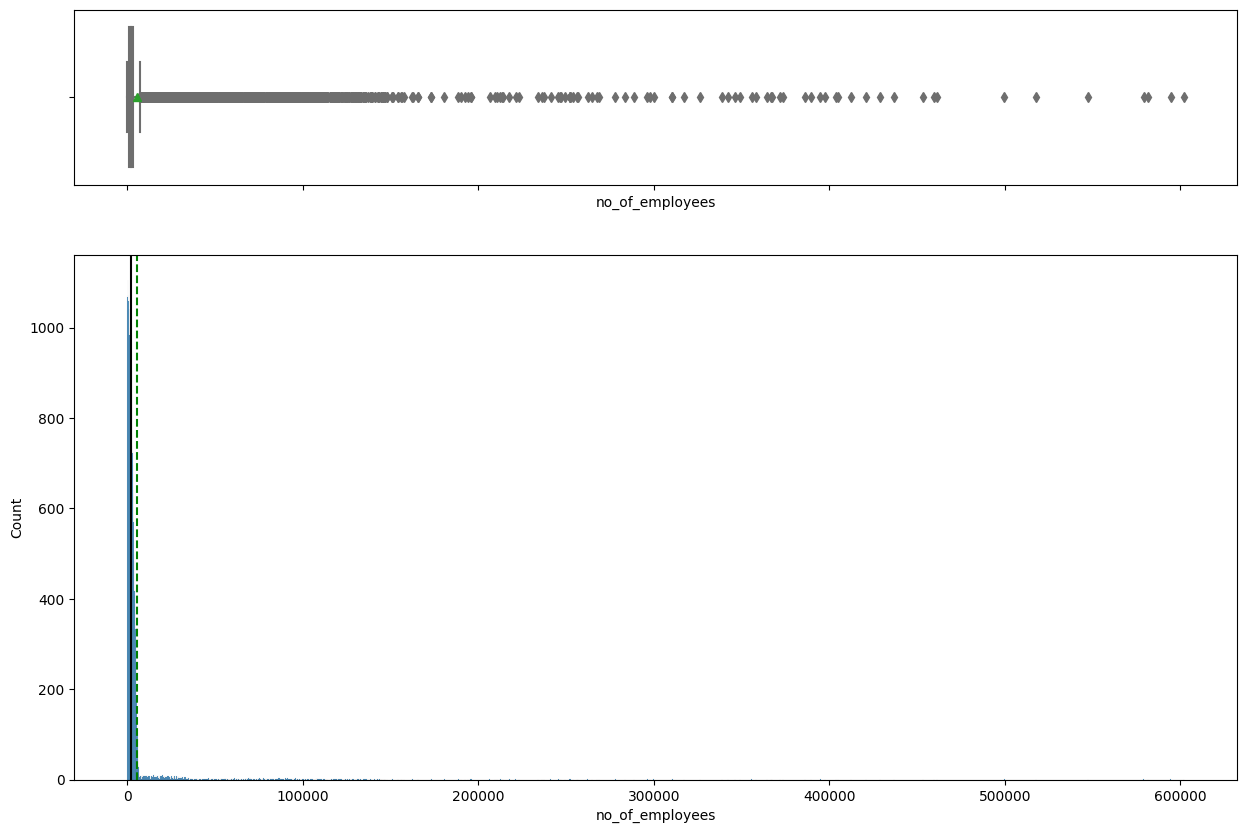

In [ ]:
histogram_boxplot(EasyV, 'no_of_employees')

#### Observations

- The distribution is highly skewed to the right
- It is highly influenced by ouliers
outliers


#### Understanding the distribution of yr_of_estab

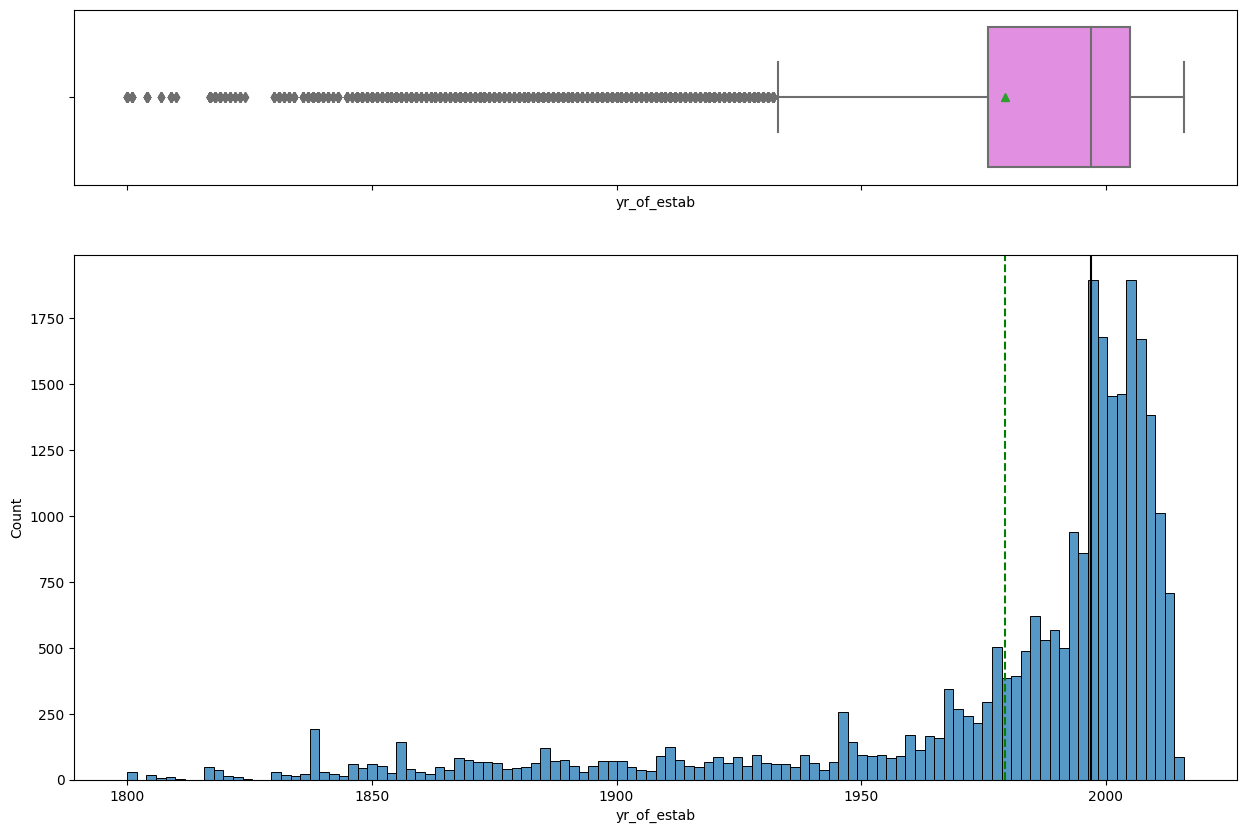

In [ ]:
histogram_boxplot(EasyV, 'yr_of_estab')

#### Observations

- The distribution is skewed to the left
- Highly influence by outliers

#### Understanding the distribution of prevailing_wage

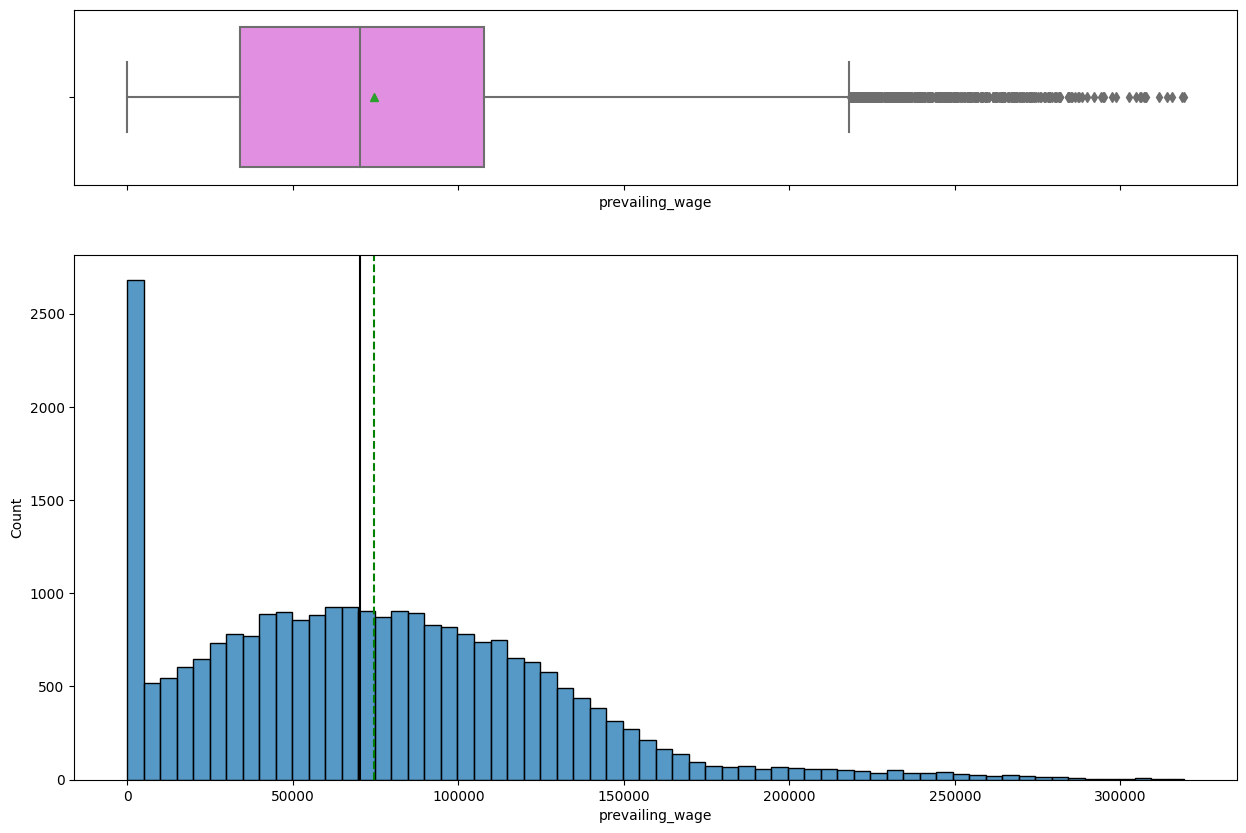

In [ ]:
histogram_boxplot(EasyV, 'prevailing_wage')

#### Observations

- data is right skewed with outliers

- average prevailing wage is approximately 75,000 dollars






In [ ]:
EasyV.groupby(EasyV['unit_of_wage'])['prevailing_wage'].count()


unit_of_wage
Hour      2157
Month       89
Week       272
Year     22962
Name: prevailing_wage, dtype: int64

In [ ]:
from pandas._libs.lib import to_object_array_tuples
def labeled_barplot(data, feature, perc=False, n=None):
  """
  data is dataframe
  feature is dataframe column
  perc is whether to display percentages instead of count
  n is to display the top n category levels
  """
  total=len(data[feature])
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count+2, 6))
  else:
    plt.figure(figsize=(n +2, 6))

  plt.xticks(rotation=90, fontsize=15)
  ax=sns.countplot(data=data, x=feature, palette='Paired', order=data[feature].value_counts().index[:n],)
  for p in ax.patches:
    if perc== True:
      label='{:.1f}%'.format(100*p.get_height()/total)
    else:
      label=p.get_height()

    x=p.get_x() +p.get_width()/2
    y=p.get_height()
    ax.annotate(label, (x,y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

  plt.show()

#### Understanding the distribution of continent

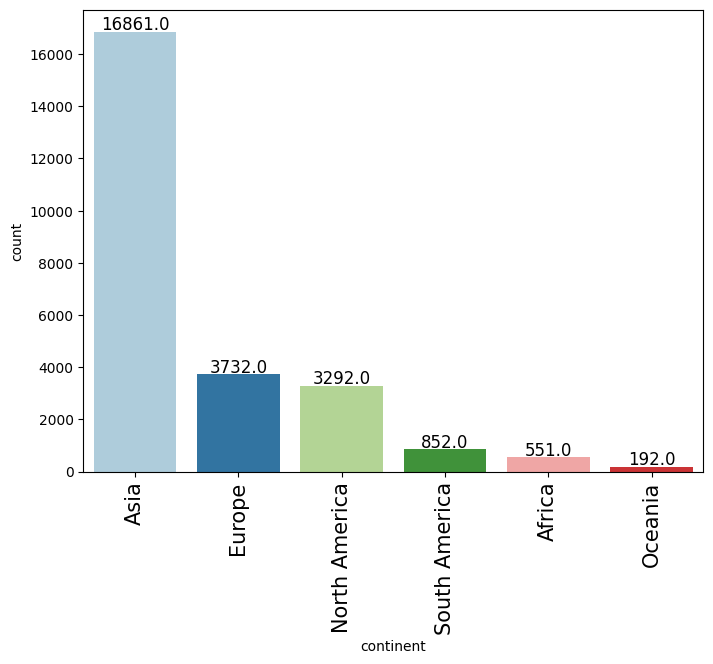

In [ ]:
labeled_barplot(EasyV, 'continent')

#### Observations

  - 16,861 employees from Asia
  - followed by Europe with 3,732 employees
  - North America with 3,292 employees
  - South America with 852 employees
  - Africa with 551 employees
  - Oceania having the least number of 192

#### Understanding the distribution of education_of_employee

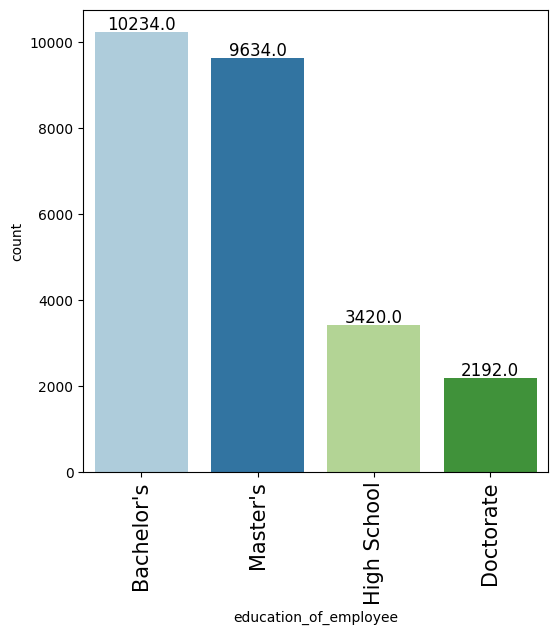

In [ ]:
labeled_barplot(EasyV, 'education_of_employee')

#### Observations
 - 10,234 of applicants had bachelors
 - 9,634 of applicants had Masters
 - 3,420 of applicants had High school
 - 2,192 of applicants had Doctorate

#### Understanding the distribution of has_job_experience

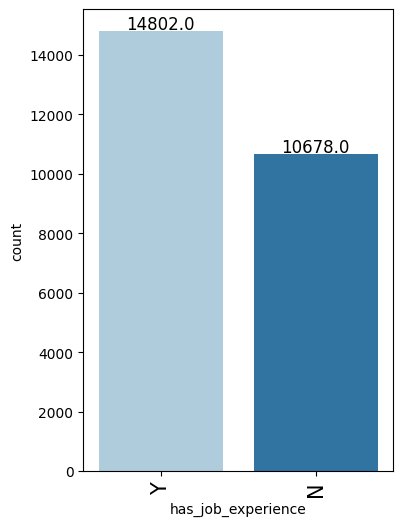

In [ ]:
labeled_barplot(EasyV, 'has_job_experience')

#### Observations
 - 14,802 of applicants had job experience
 - 10,678 of applicants had no job experience



#### Understanding the distribution of requires_job_training

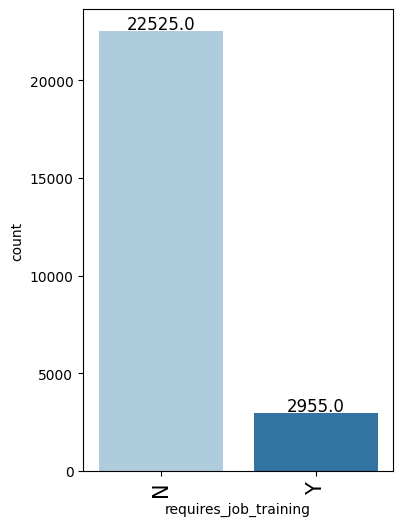

In [ ]:
labeled_barplot(EasyV, 'requires_job_training')

#### Observations
 - Majority about 22,525 of employees does not require job training
 - 2,955 of employees do not require job training

#### Understanding the distribution of region_of_employment

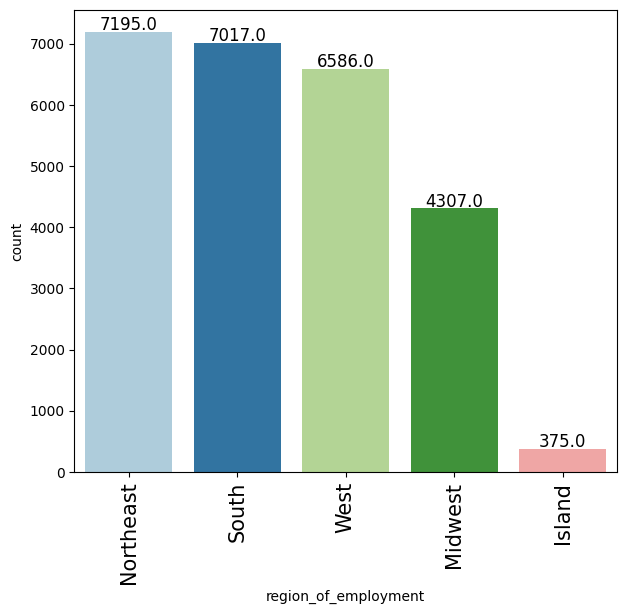

In [ ]:
labeled_barplot(EasyV, 'region_of_employment')

#### Observations
 - Top 3 regions of employment are Northeast, South and West

#### Understanding the distribution of unit_of_wage

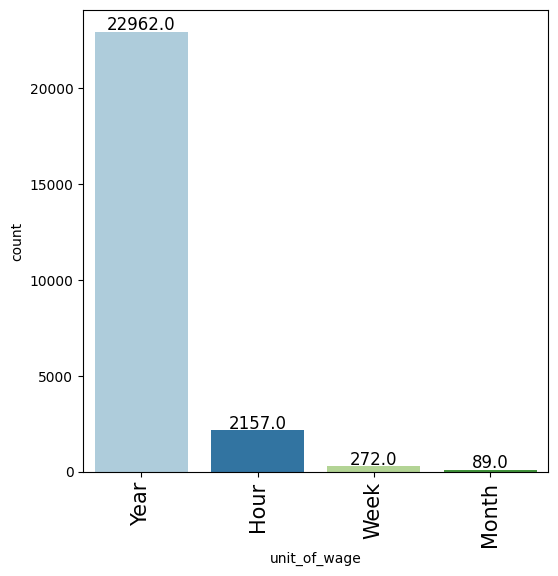

In [ ]:
labeled_barplot(EasyV, 'unit_of_wage')

#### Observations
 - 22,962 employments had yearly wage
 - 2,157 had hourly wage

#### Understanding the distribution of full_time_position

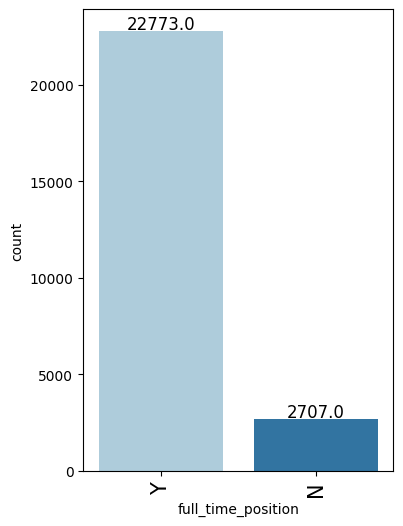

In [ ]:
labeled_barplot(EasyV, 'full_time_position')

#### Observations
 - 22,773 were full time employment
 - 2,707 were not full time

#### Understanding the distribution of case status

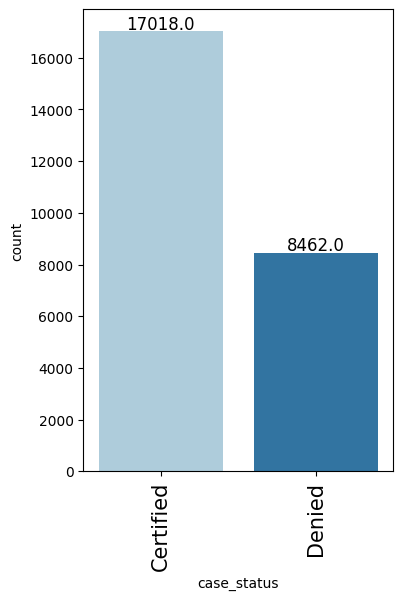

In [ ]:
labeled_barplot(EasyV, 'case_status')

#### Observations
 - 17,018 employees were certified
 - 8,462 employees were denied

##**Bivariate** Analysis

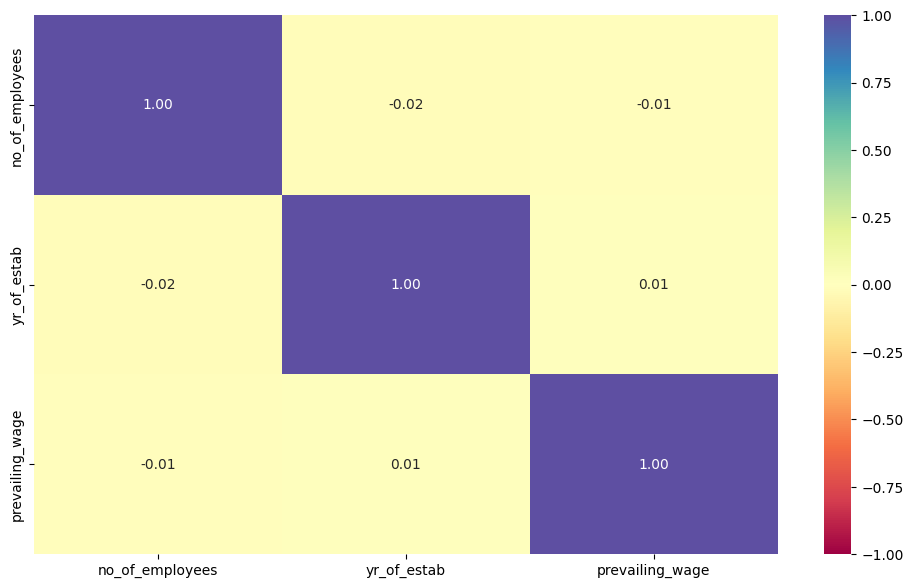

In [ ]:
num_cols = EasyV.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    EasyV[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Observations
- The heatmap above indicates very low correlation among the numerical varriables

In [ ]:


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Understanding the relationship between continent and case status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


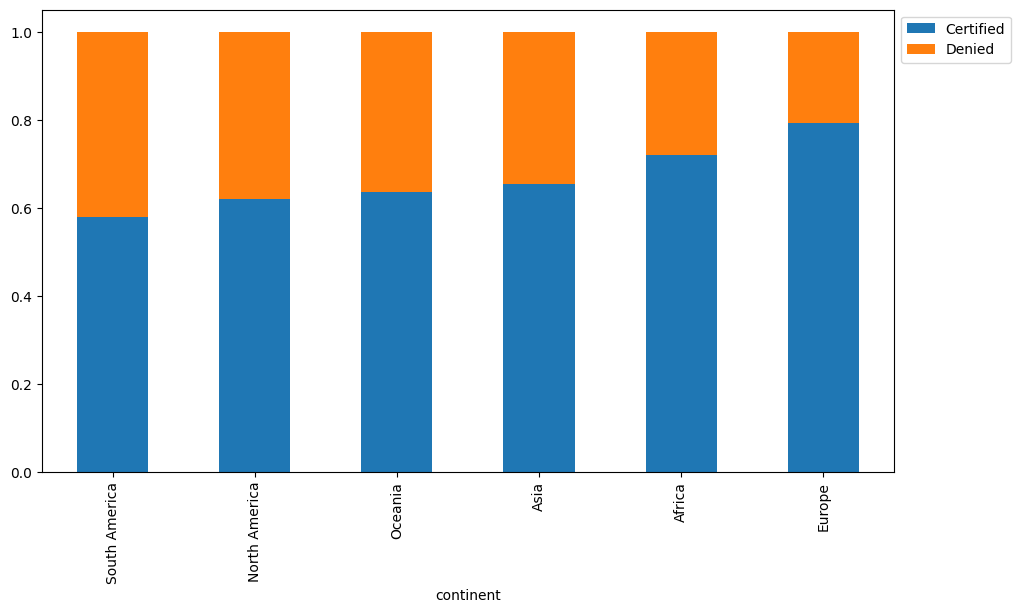

In [ ]:
stacked_barplot(EasyV, 'continent', 'case_status')

#### Observations
 - Employees from Europe were the most with visa certification rate, followed by Africa, Asia, Oceana, North America and South America

#### Understanding the relationship between education of employee and case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


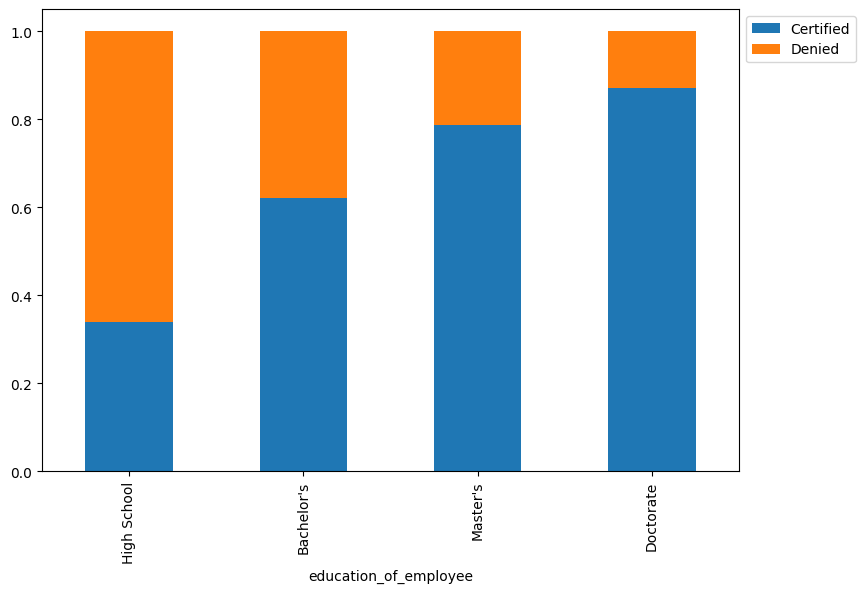

In [ ]:
stacked_barplot(EasyV, 'education_of_employee', 'case_status')

#### Observations
 - Employees with Doctorate were the most likely certified for Visa, followed by those with Masters, Bachelor and High School
 - This implies education plays important role in visa certification

#### Understanding the relationship between job experience and case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


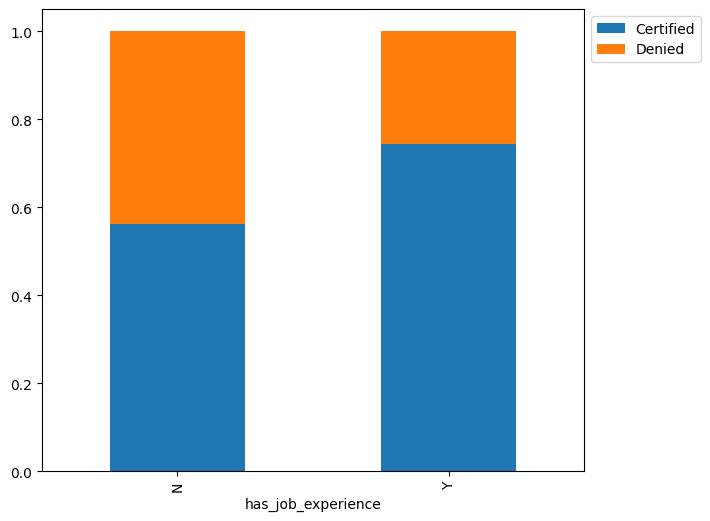

In [ ]:
stacked_barplot(EasyV, 'has_job_experience', 'case_status')

#### Observations
 - Employees with previous job experience were the most likely to be certified for Visa

#### Understanding the relationship between unit of wage and case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


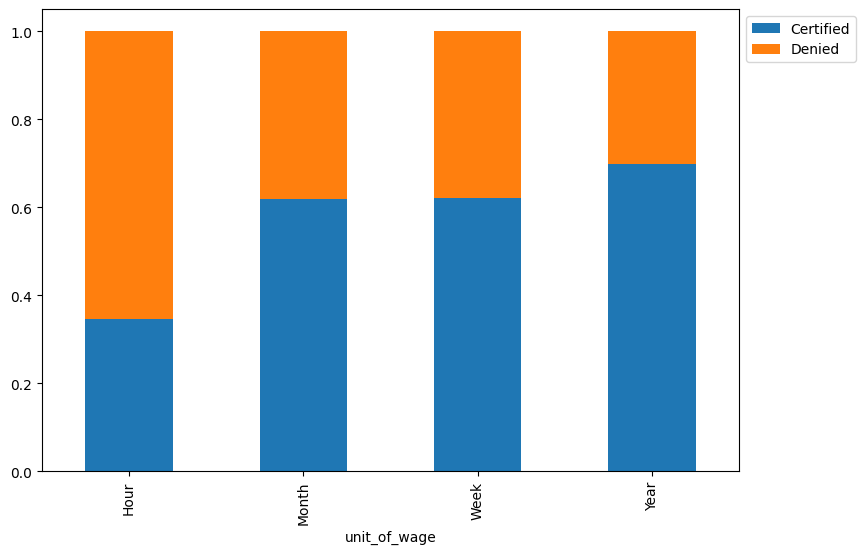

In [ ]:
stacked_barplot(EasyV, 'unit_of_wage', 'case_status')

#### Observations
 - Employees with yearly pay unit were the most likely to be certified for Visa, followed by those with weekly and monthly having equal likelihood, and hourly

#### Understanding the relationship between requires job training and case status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


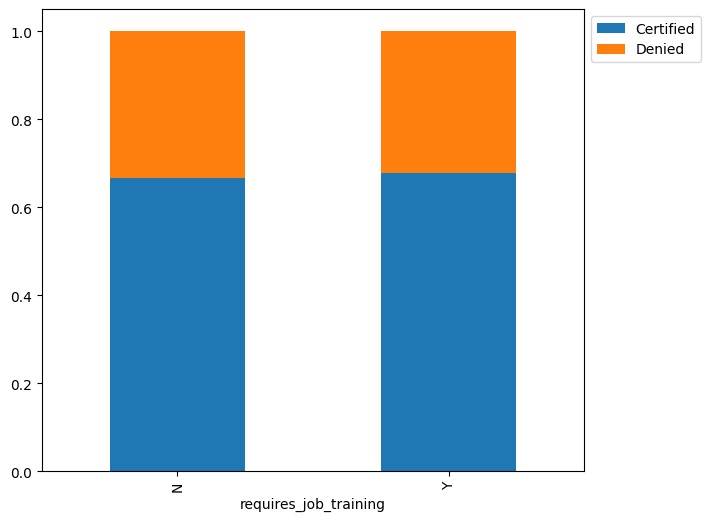

In [ ]:
stacked_barplot(EasyV, 'requires_job_training', 'case_status')

#### Observations
 - Visa certification is not likely to be affected by whether employee requires job training or not, there is equal likelihood

#### Understanding the relationship between region of employment and case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


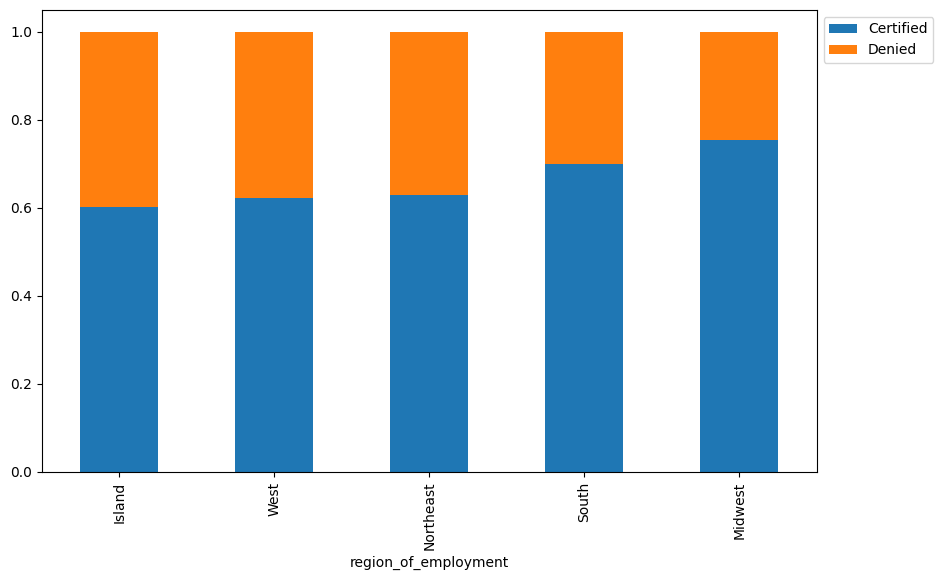

In [ ]:
stacked_barplot(EasyV, 'region_of_employment', 'case_status')

#### Observations
 - Visa certification is more likely if region of employment is Midwest and South compared to other regions

#### Understanding the relationship between full time position and case status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


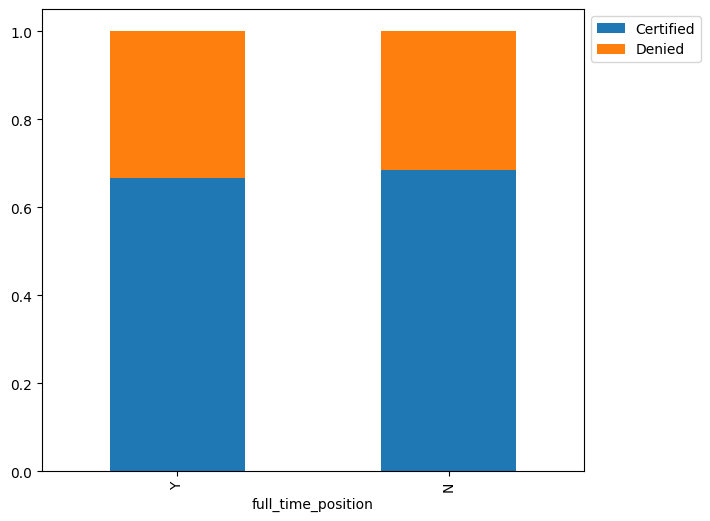

In [ ]:
stacked_barplot(EasyV, 'full_time_position', 'case_status')

#### Observations
 - Visa certification is not likely to be affected by whether employment is full time or not

In [ ]:

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Understanding the distribution of prevailing wage and case status

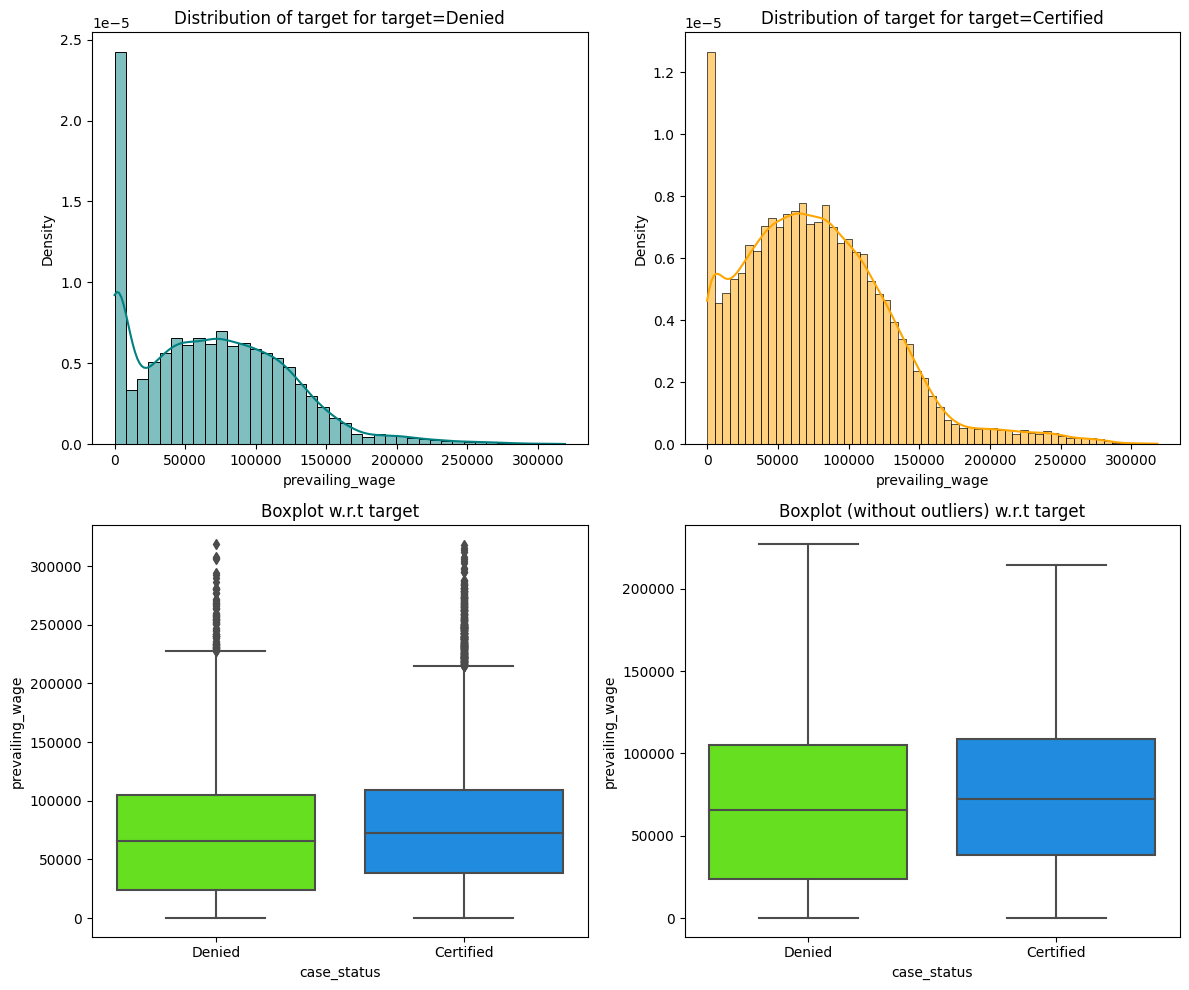

In [ ]:
distribution_plot_wrt_target(EasyV, 'prevailing_wage', 'case_status')

#### Observations
 - The mode prevailing wage for certified visa cases are slighly higher than those denied

#### Understanding the distribution of number of employees, continent and case status

<Figure size 3500x2000 with 0 Axes>

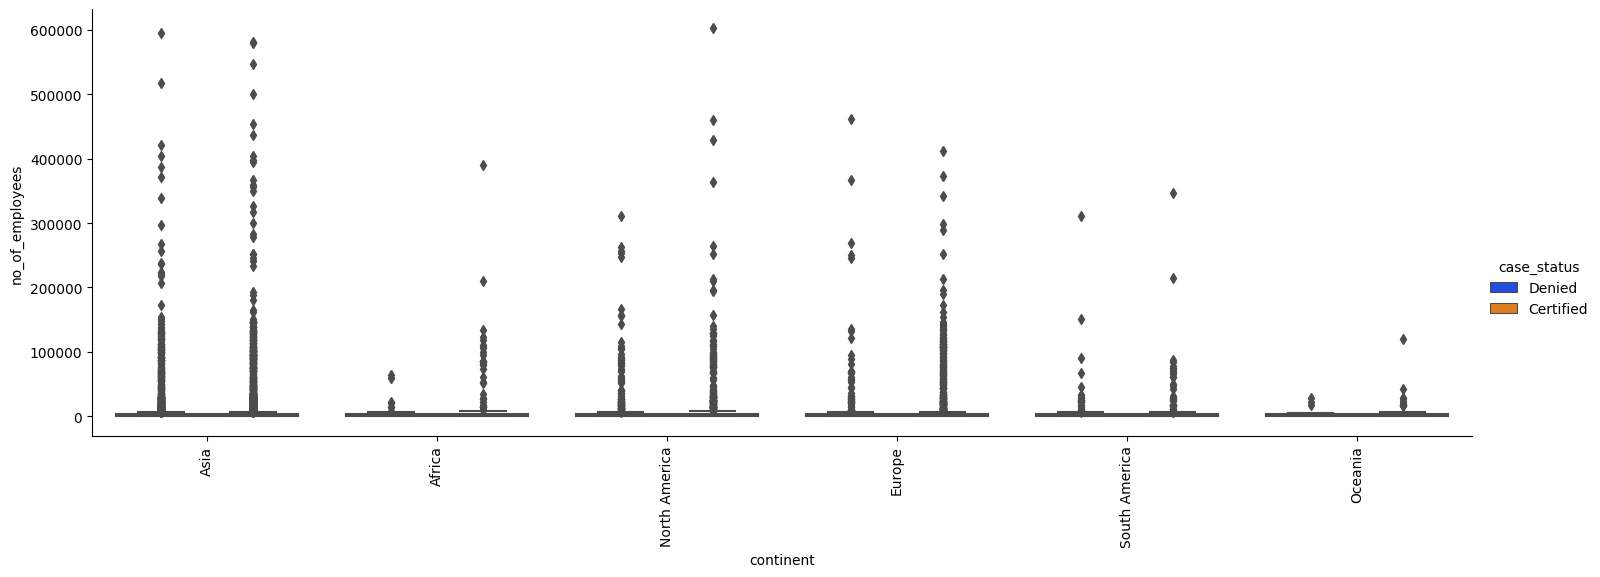

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='continent', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

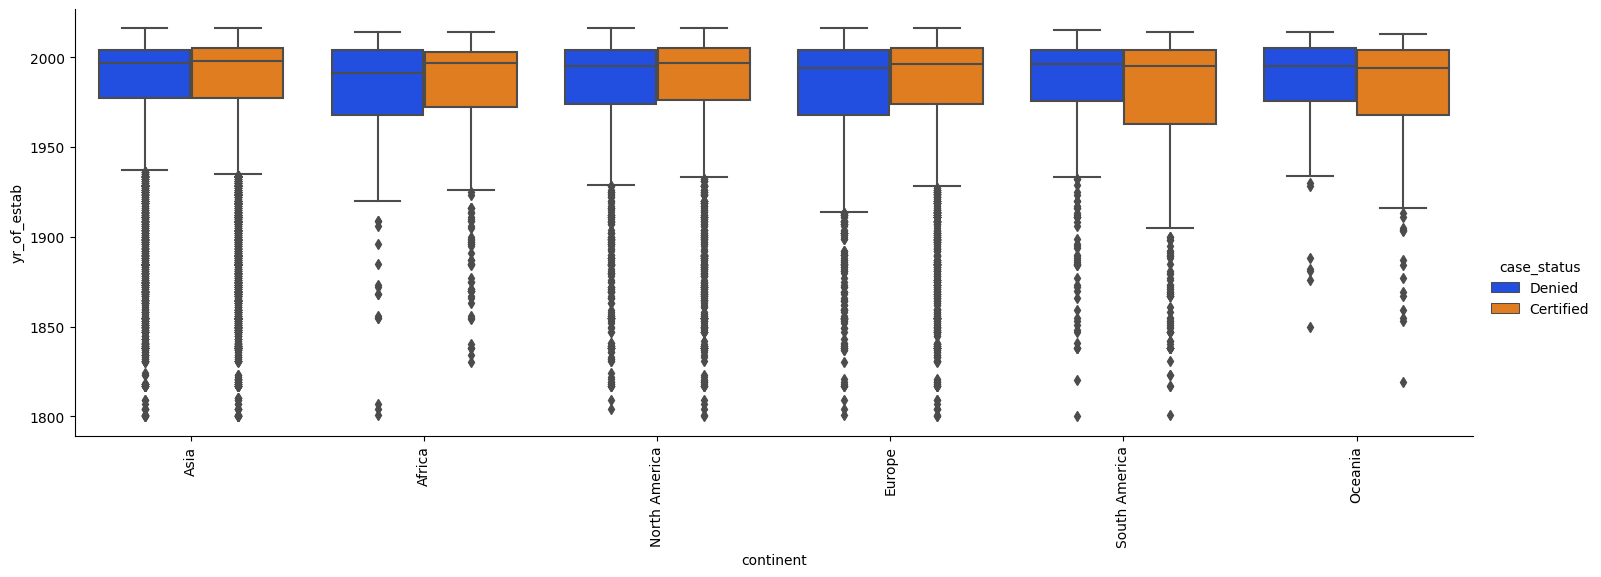

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='continent', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

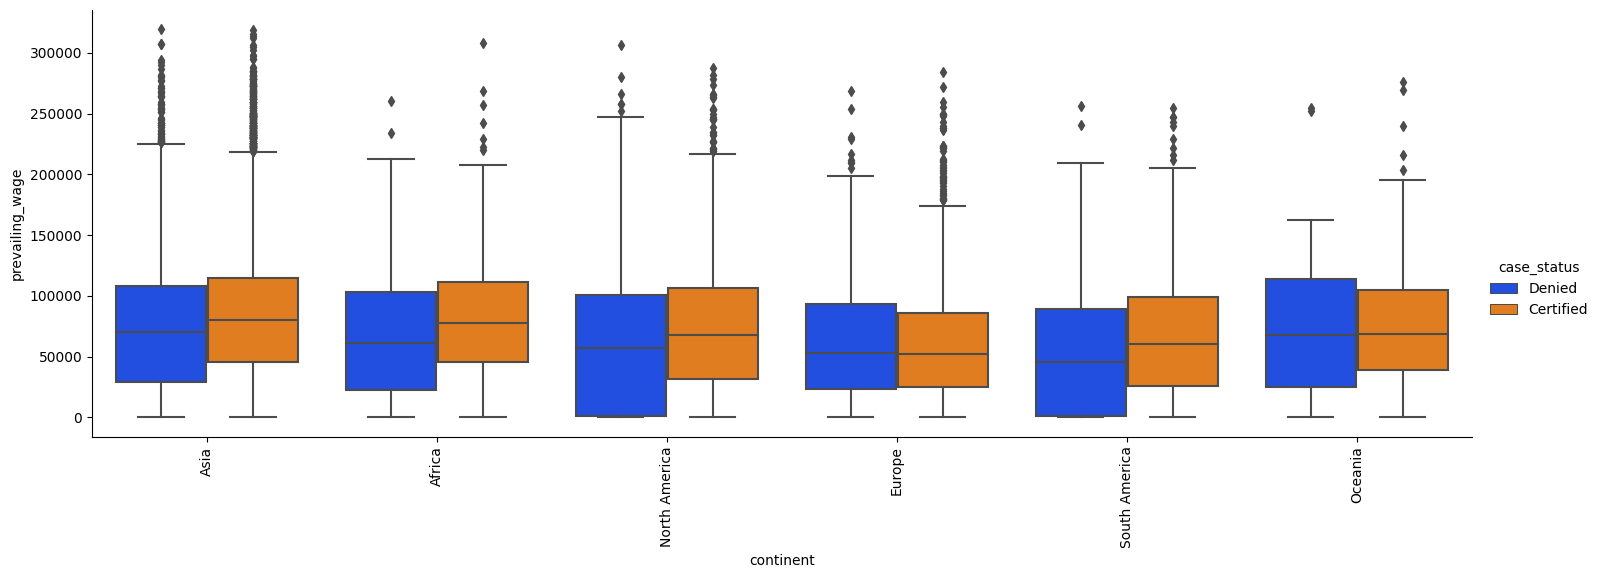

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='continent', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

  - Apart from Europe and Oceania, where we had equal mode prevailing wage for either certified or denied cases, all the remaining cases have mode prevailing wage for certifed higher than those of denied.

#### Understanding the distribution of number of employees, education of employee and case status

<Figure size 3500x2000 with 0 Axes>

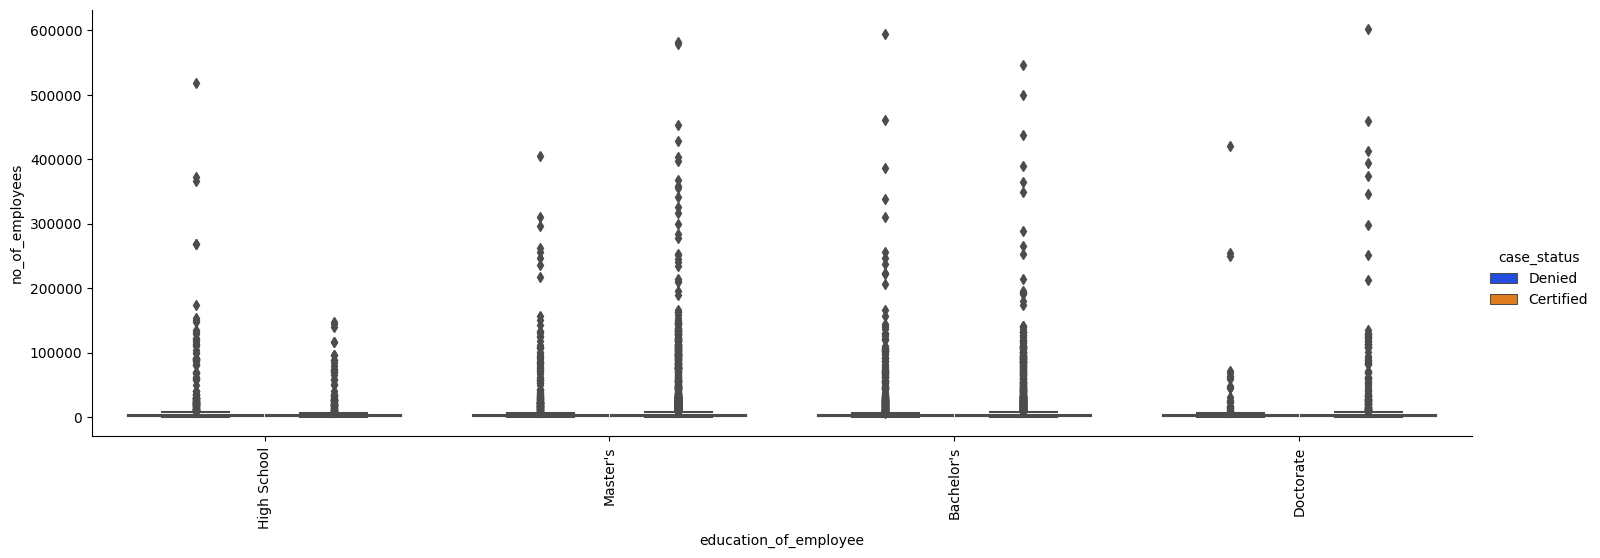

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='education_of_employee', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

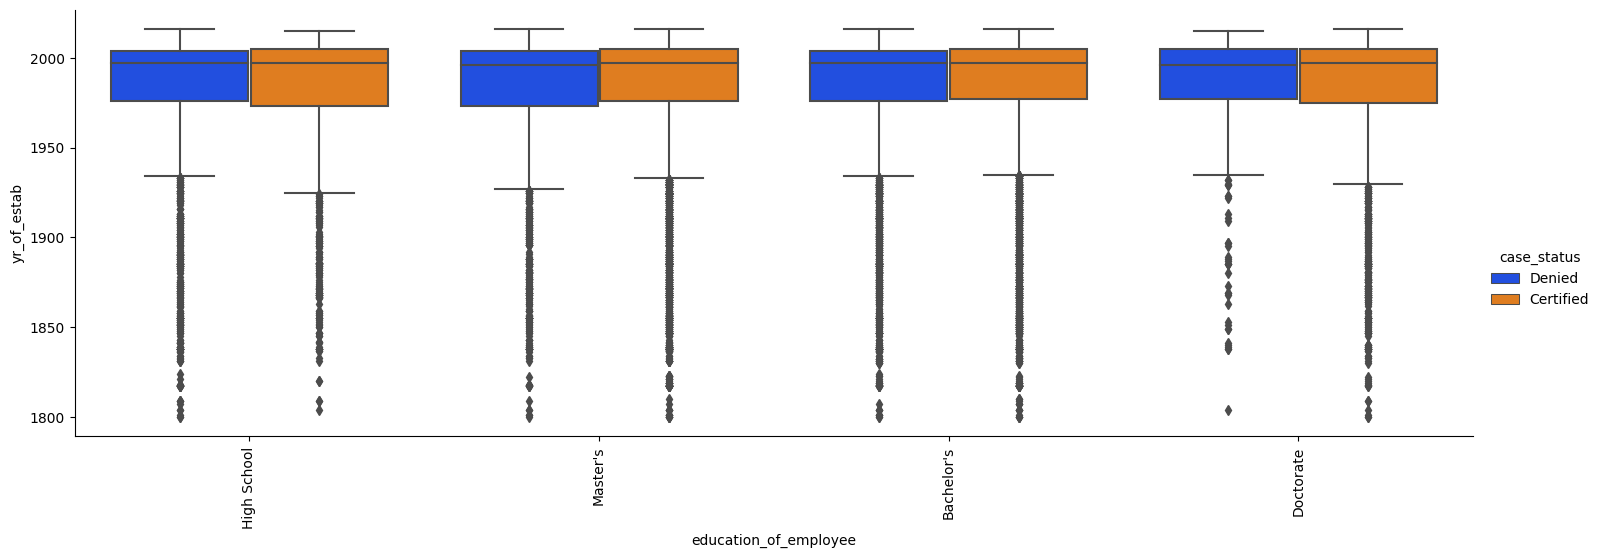

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='education_of_employee', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

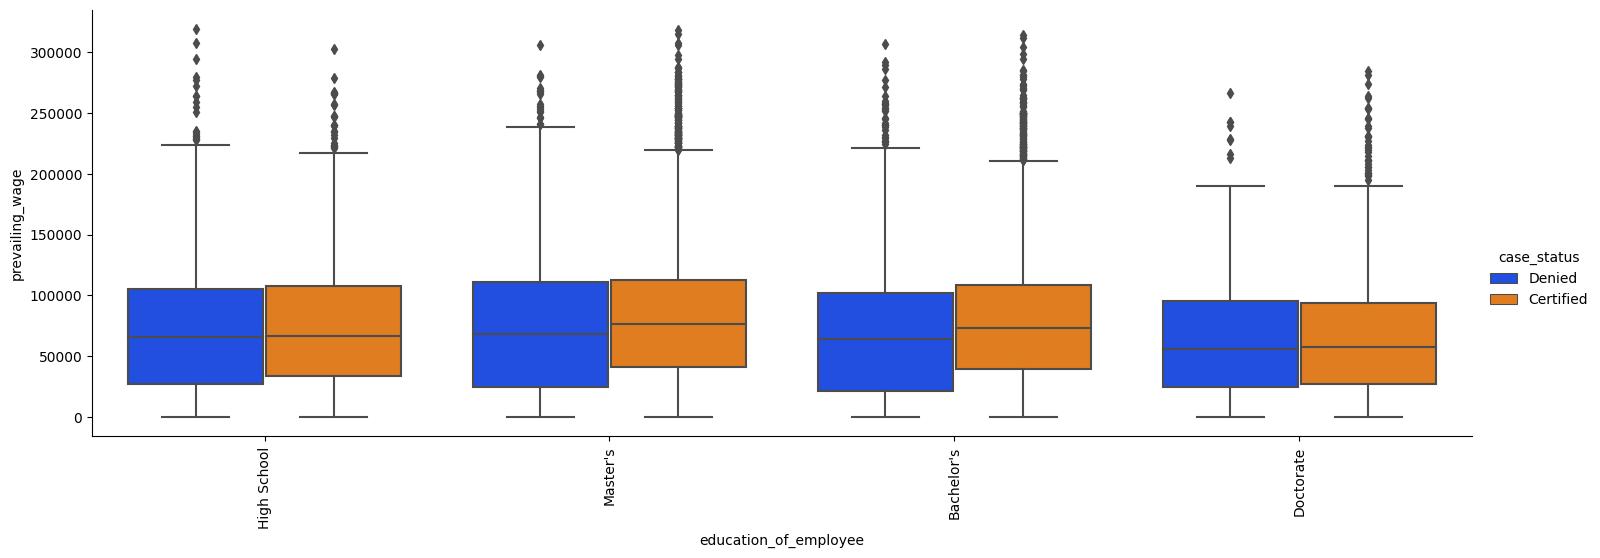

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='education_of_employee', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Understanding the distribution of number of employees, 'has_job_experience' and case status

<Figure size 3500x2000 with 0 Axes>

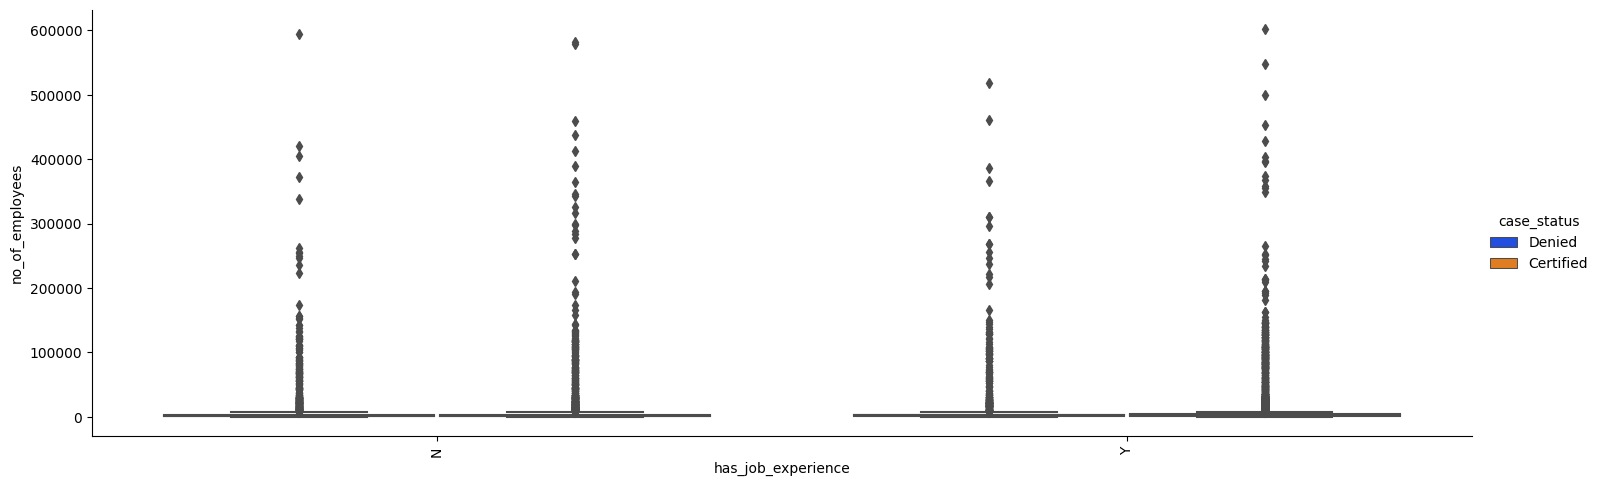

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='has_job_experience', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

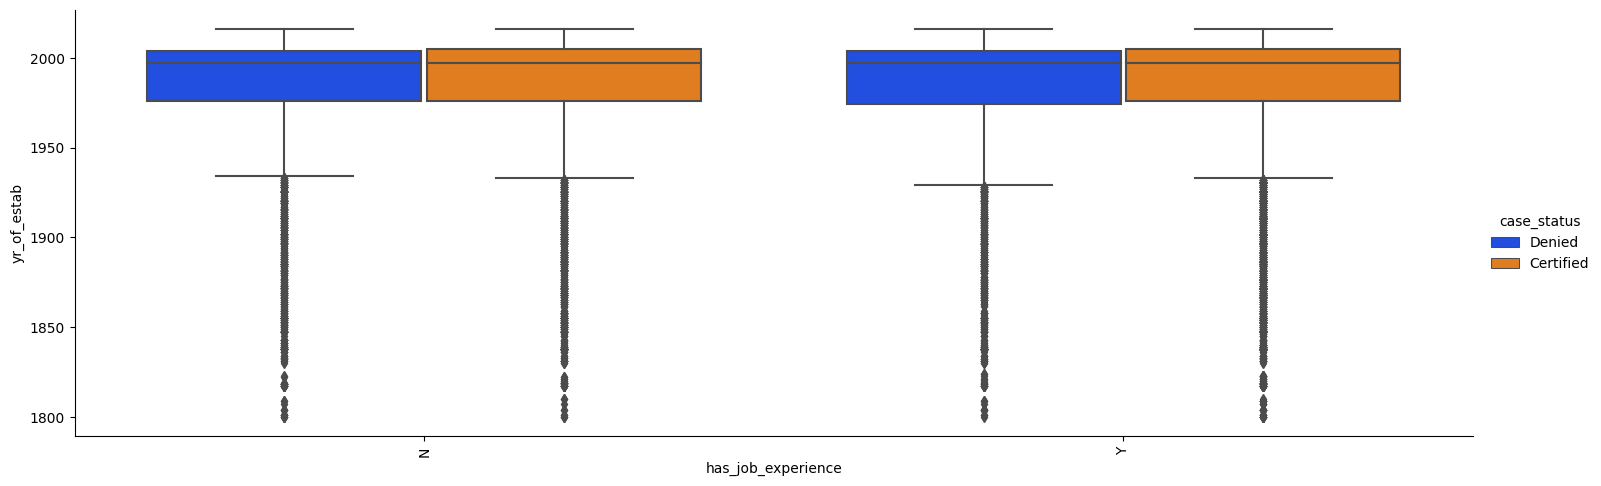

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='has_job_experience', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

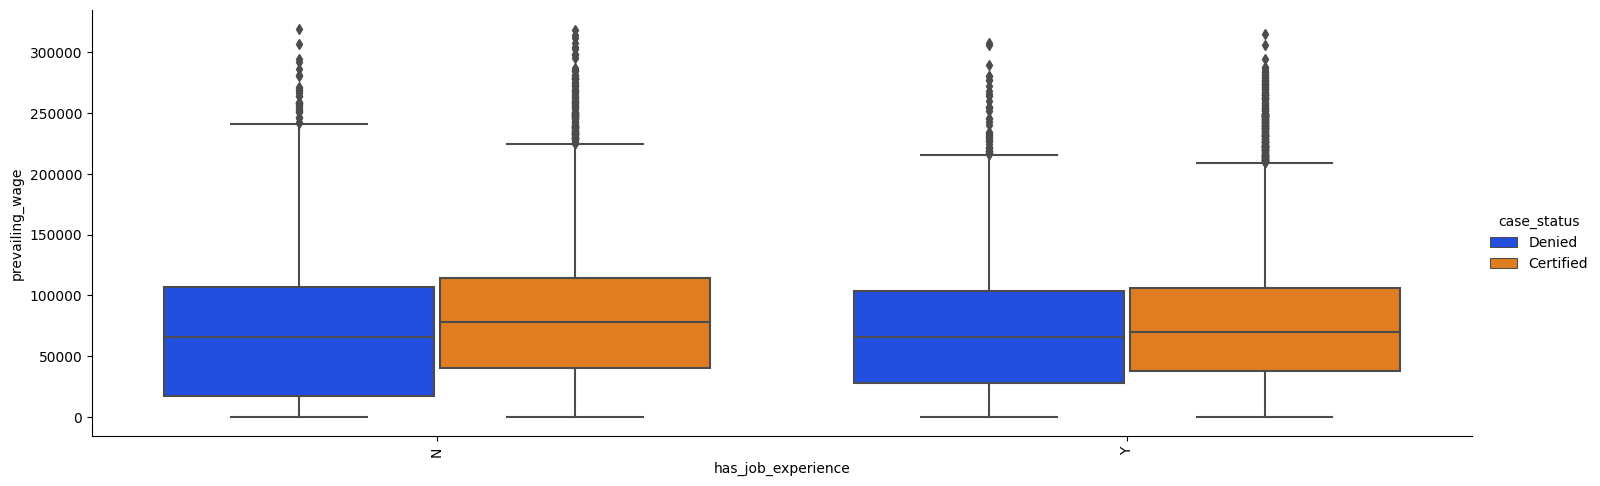

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='has_job_experience', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Understanding the distribution of number of employees, 'requires_job_training' and case status

<Figure size 3500x2000 with 0 Axes>

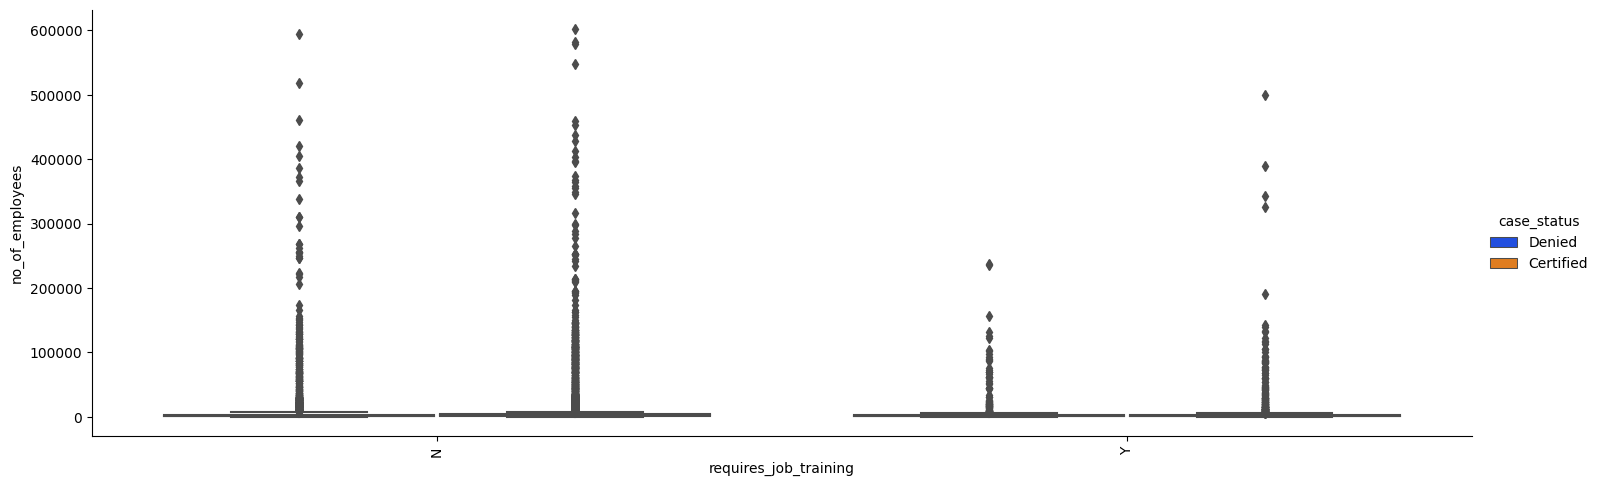

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='requires_job_training', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

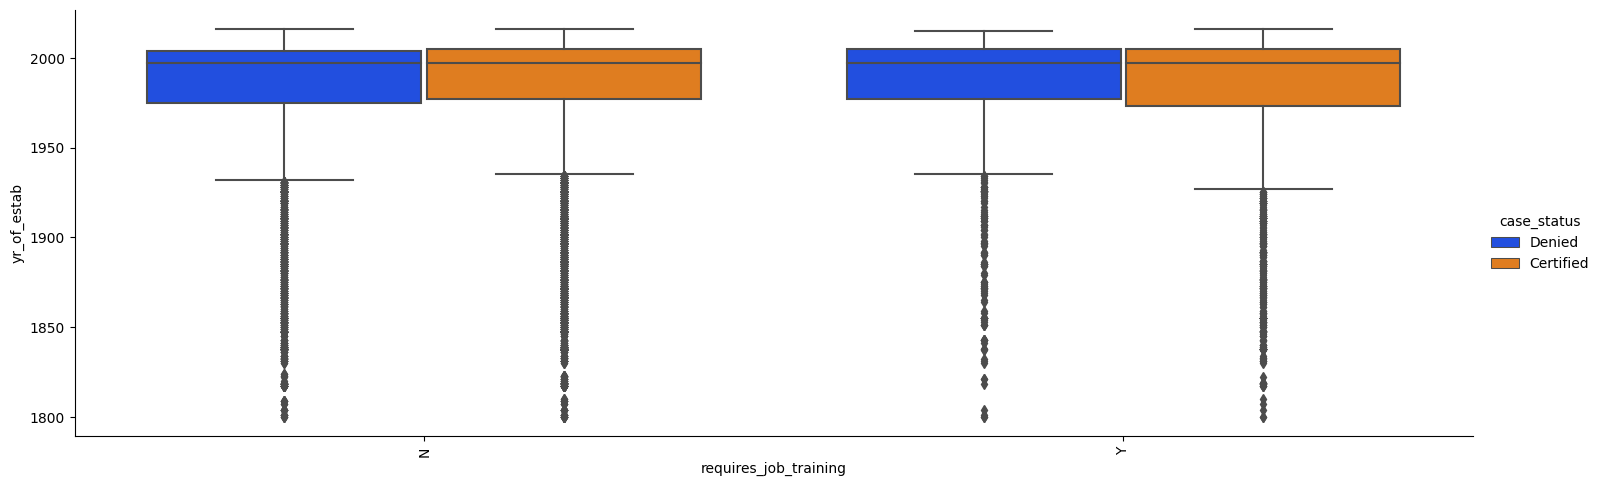

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='requires_job_training', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

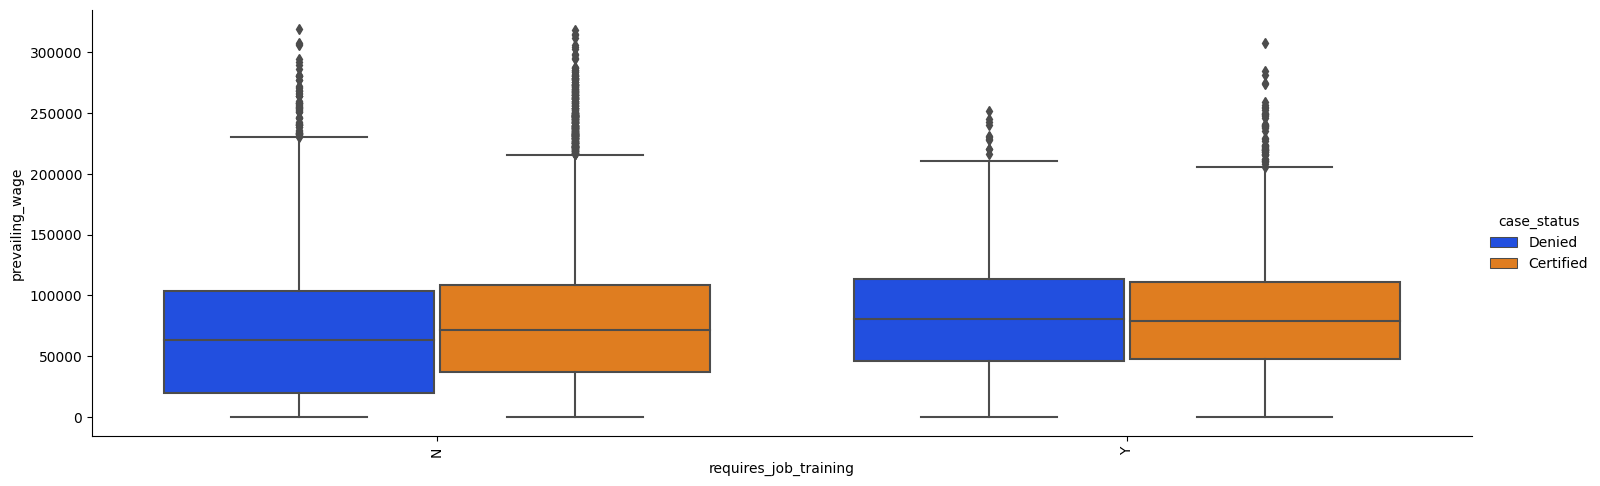

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='requires_job_training', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Understanding the distribution of number of employees, 'region_of_employment' and case status

<Figure size 3500x2000 with 0 Axes>

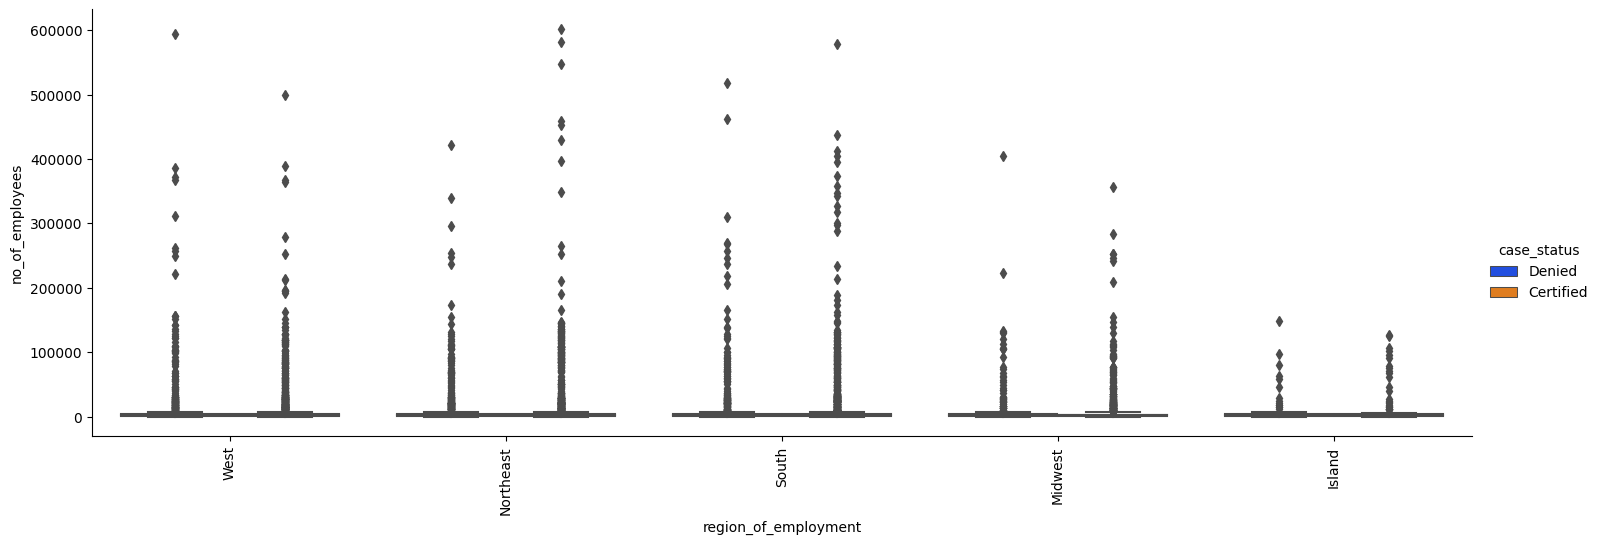

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='region_of_employment', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

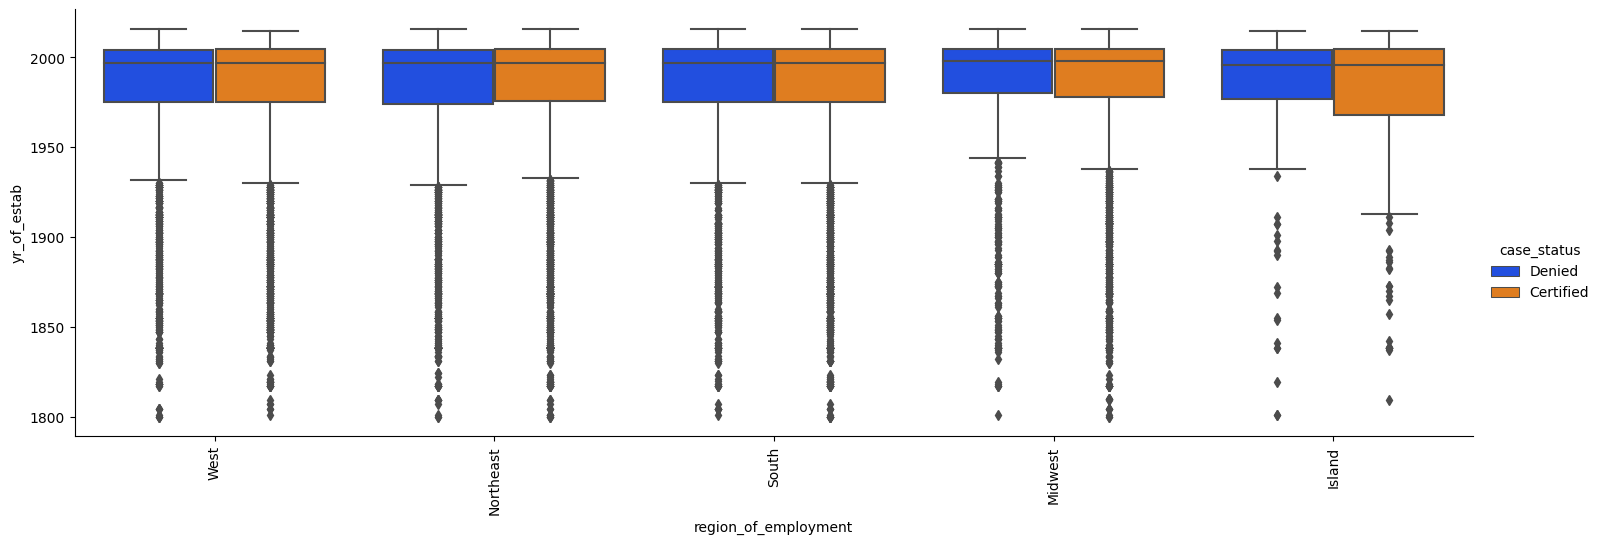

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='region_of_employment', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

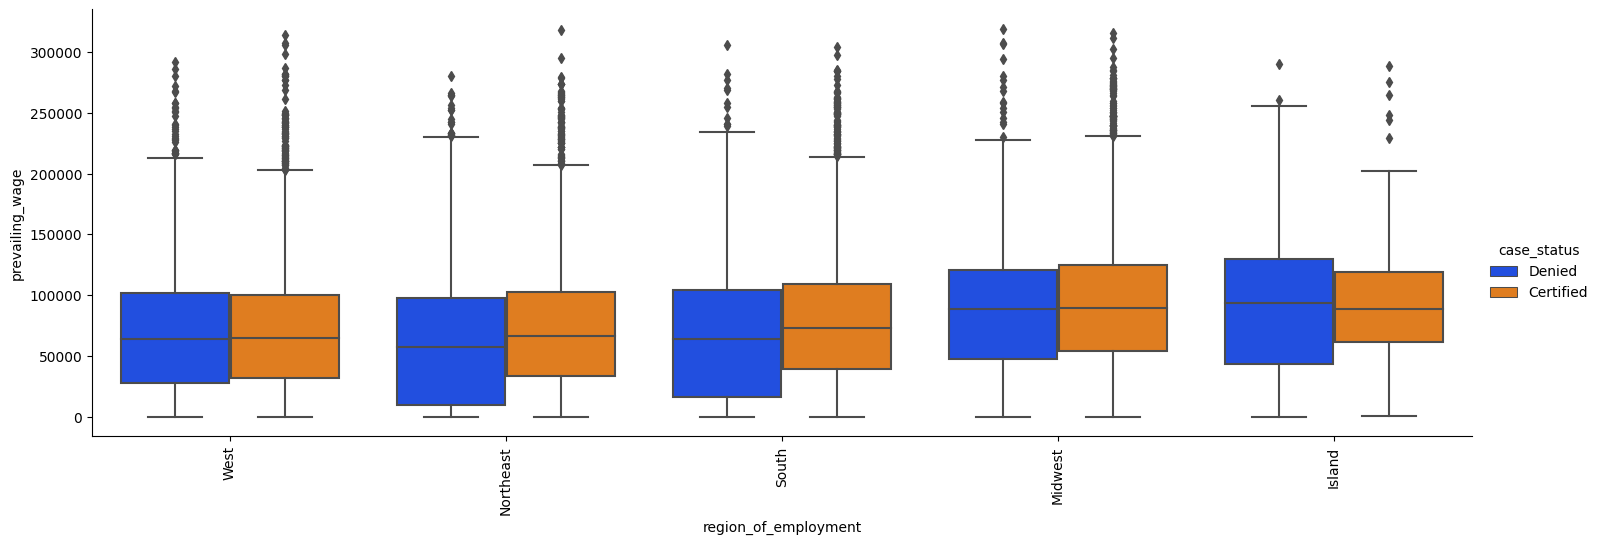

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='region_of_employment', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Understanding the distribution of number of employees, 'unit_of_wage' and case status

<Figure size 3500x2000 with 0 Axes>

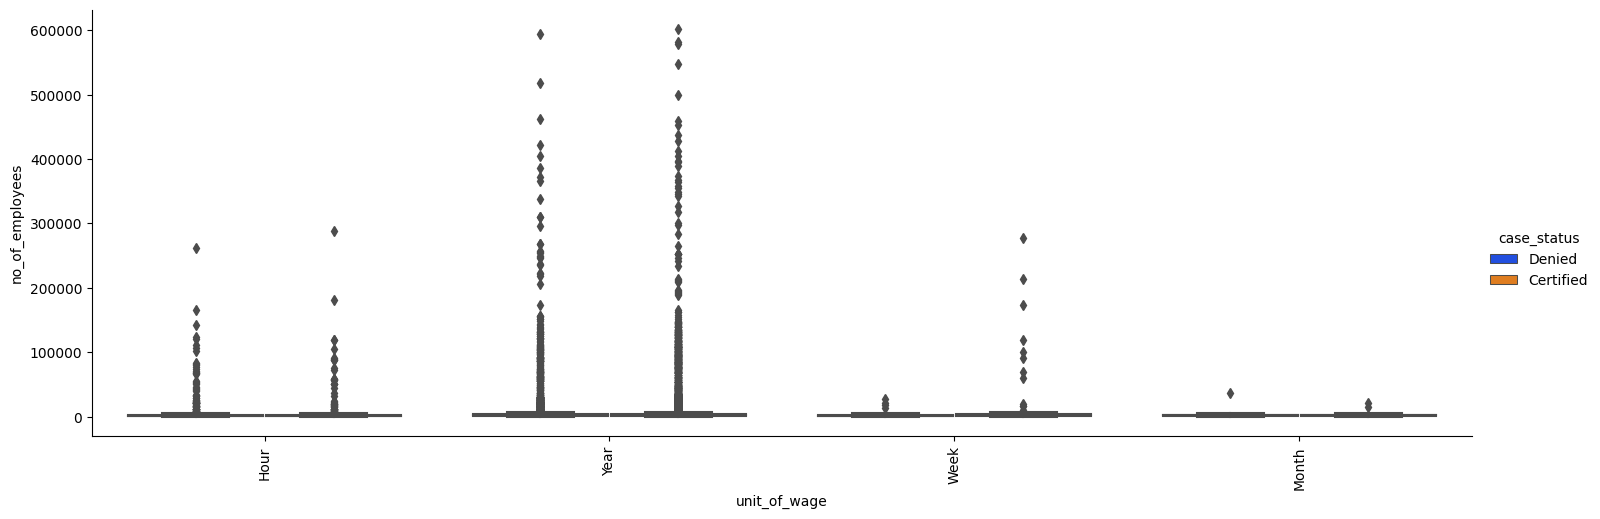

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='unit_of_wage', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

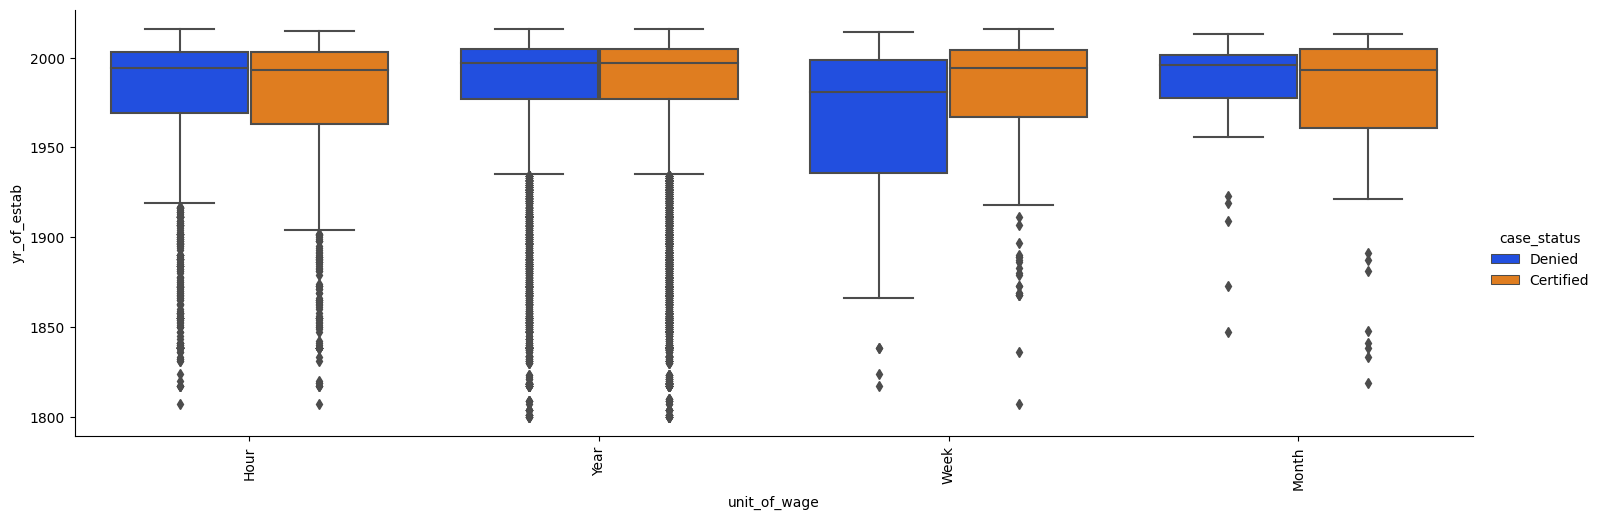

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='unit_of_wage', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

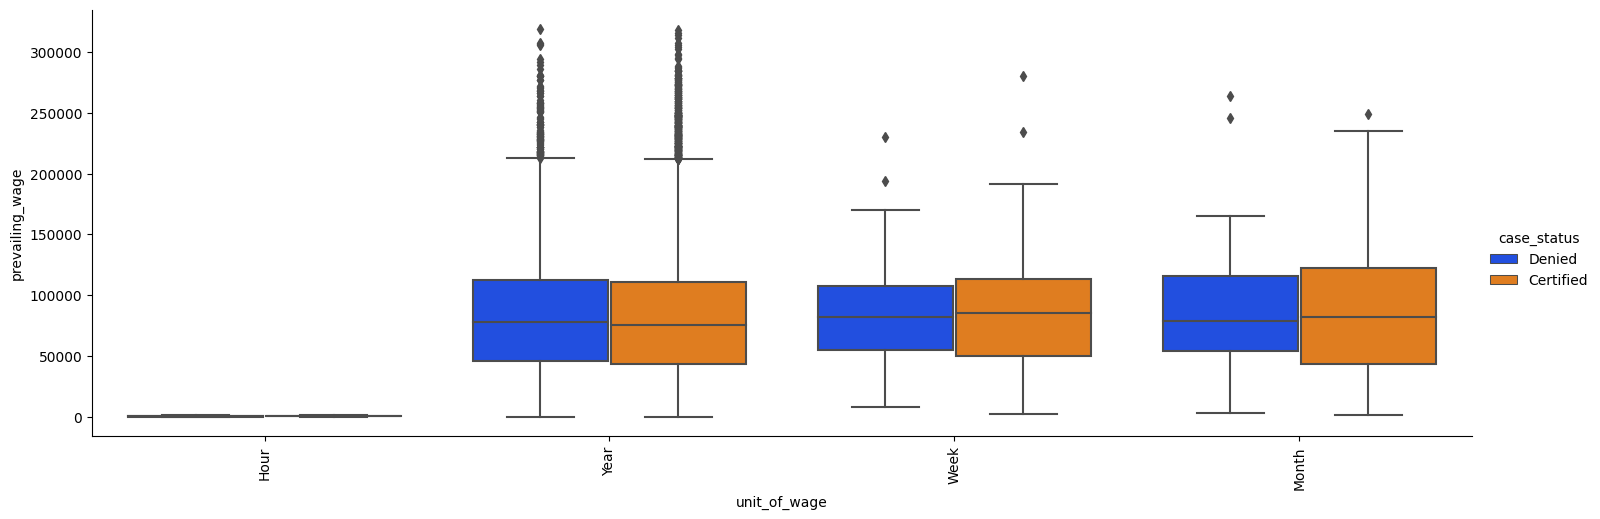

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='unit_of_wage', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Understanding the distribution of number of employees, 'full_time_position' and case status

<Figure size 3500x2000 with 0 Axes>

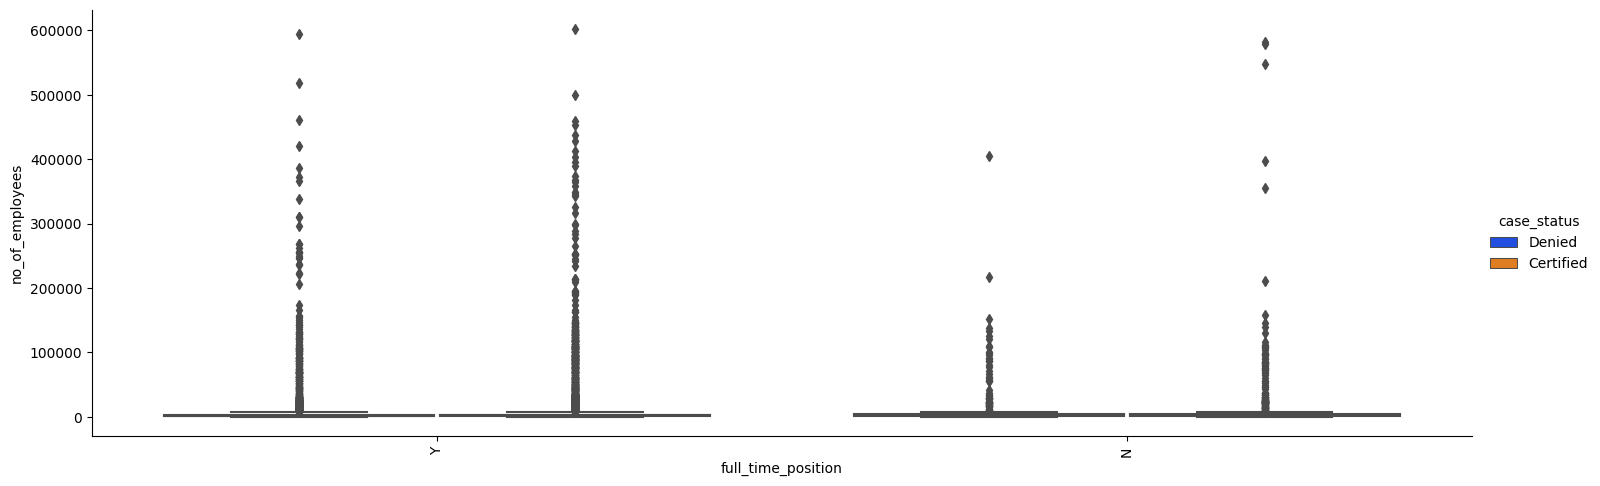

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='full_time_position', y='no_of_employees', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

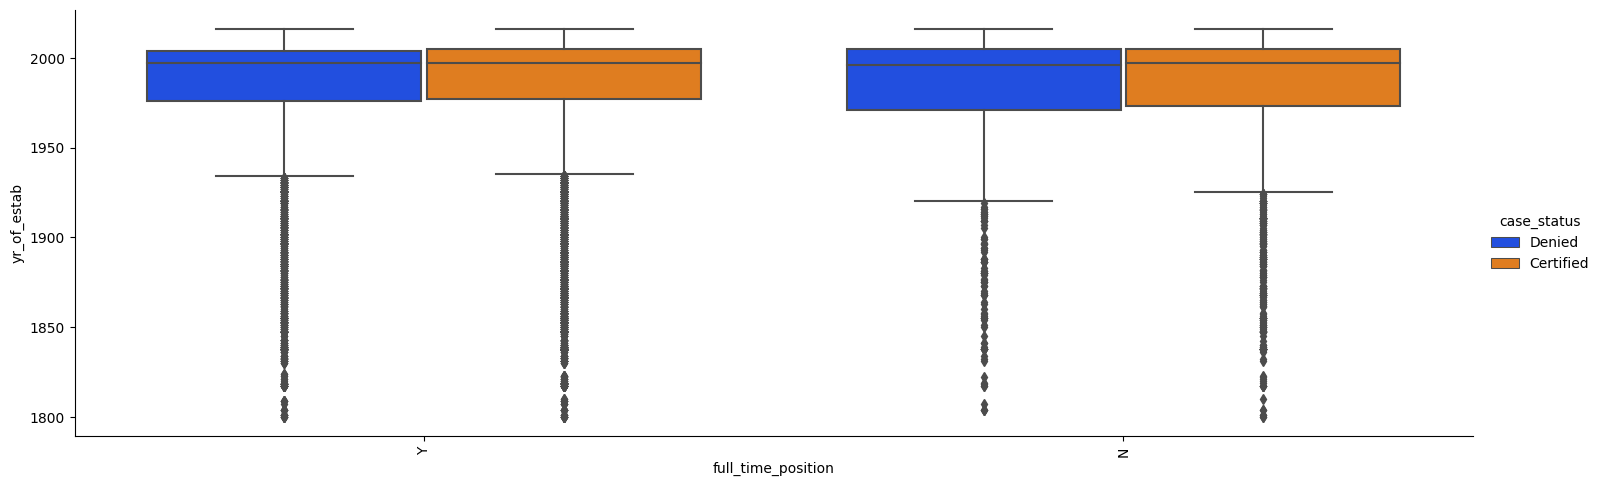

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='full_time_position', y='yr_of_estab', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 3500x2000 with 0 Axes>

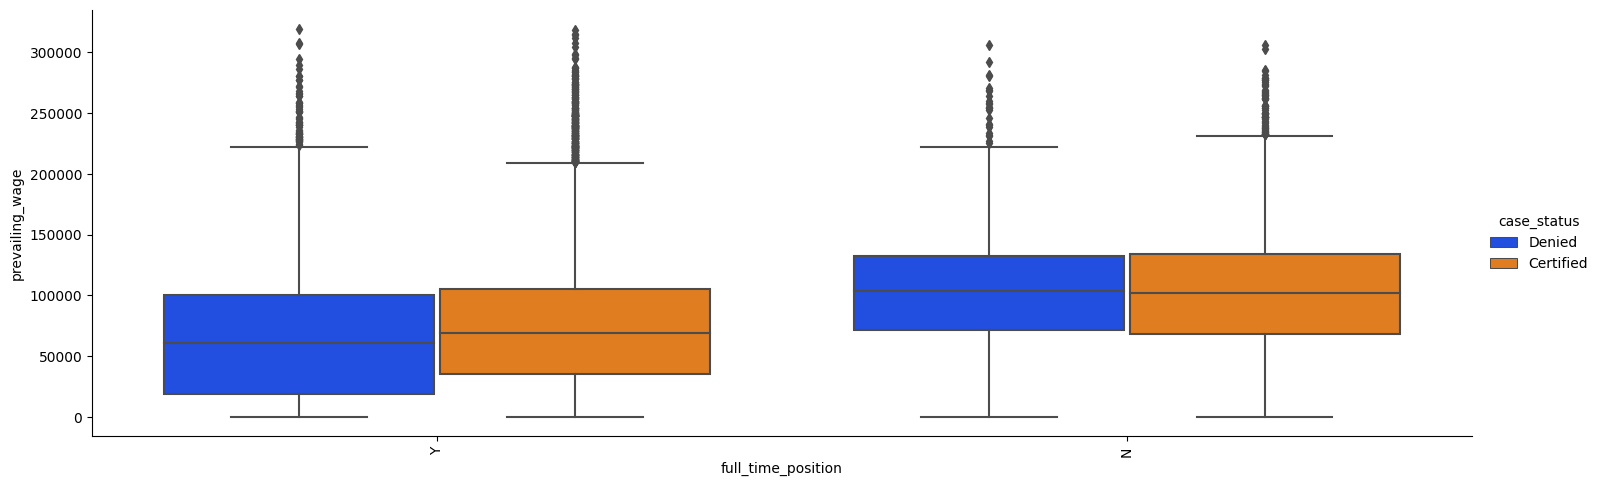

In [ ]:
plt.figure(figsize=(35,20))
sns.catplot(data=EasyV, x='full_time_position', y='prevailing_wage', hue='case_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### General EDA observations



> We observed employees with higher level education are more likely to be certified for Visa than those with low level



> We observed employees from Europe were the most with visa certification rate, followed by Africa, Asia, Oceana, North America and South America



> We observed employees with previous job experience were the most likely to be certified for Visa



> We observed yearly pay unit is the most likely to be certified for visa


> We observed that the mode prevailing wage certified visa are slighly higher than those denied











## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
EV=EasyV.copy()

In [ ]:
EV=EV.drop(['case_id'], axis=1)

In [ ]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


## Preparing data for modeling

####converting the columns with an 'object' datatype into categorical variables

In [ ]:
for feature in EV.columns:
    if EV[feature].dtype == 'object':
        EV[feature] = pd.Categorical(EV[feature])
EV.head(10)

continent education_of_employee has_job_experience  \
0           Asia           High School                  N   
1           Asia              Master's                  Y   
2           Asia            Bachelor's                  N   
3           Asia            Bachelor's                  N   
4         Africa              Master's                  Y   
5           Asia              Master's                  Y   
6           Asia            Bachelor's                  N   
7  North America            Bachelor's                  Y   
8           Asia            Bachelor's                  N   
9         Europe             Doctorate                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   
5                     N             2339         2012                South   
6                     N             4985         1994                South   
7                     N             3035         1924                 West   
8                     N             4810         2012              Midwest   
9                     N             2251         1995                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified  
5       78252.1400         Year                  Y   Certified  
6       53635.3900         Year                  Y   Certified  
7         418.2298         Hour                  Y      Denied  
8       74362.1900         Year                  Y   Certified  
9       67514.7600         Year                  Y   Certified

In [ ]:
print(EV.continent.value_counts())
print(' ')
print(EV.education_of_employee.value_counts())
print(' ')
print(EV.	has_job_experience.value_counts())
print(' ')
print(EV.requires_job_training.value_counts())
print(' ')
print(EV.region_of_employment.value_counts())
print(' ')
print(EV.unit_of_wage.value_counts())
print(' ')
print(EV.full_time_position.value_counts())
print(' ')
print(EV.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
 
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
 
Y    14802
N    10678
Name: has_job_experience, dtype: int64
 
N    22525
Y     2955
Name: requires_job_training, dtype: int64
 
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
 
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
 
Y    22773
N     2707
Name: full_time_position, dtype: int64
 
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
replaceStruct = {
                "case_status": {"Certified": 1, "Denied": 0 }
                    }
oneHotCols=["continent","education_of_employee","region_of_employment","unit_of_wage","has_job_experience","requires_job_training","full_time_position"]

In [ ]:
EV=EV.replace(replaceStruct)
EV=pd.get_dummies(EV, columns=oneHotCols)
EV.head(10)

no_of_employees  yr_of_estab  prevailing_wage case_status  \
0            14513         2007         592.2029           0   
1             2412         2002       83425.6500           1   
2            44444         2008      122996.8600           0   
3               98         1897       83434.0300           0   
4             1082         2005      149907.3900           1   
5             2339         2012       78252.1400           1   
6             4985         1994       53635.3900           1   
7             3035         1924         418.2298           0   
8             4810         2012       74362.1900           1   
9             2251         1995       67514.7600           1   

   continent_Africa  continent_Asia  continent_Europe  \
0                 0               1                 0   
1                 0               1                 0   
2                 0               1                 0   
3                 0               1                 0   
4                 1               0                 0   
5                 0               1                 0   
6                 0               1                 0   
7                 0               0                 0   
8                 0               1                 0   
9                 0               0                 1   

   continent_North America  continent_Oceania  continent_South America  \
0                        0                  0                        0   
1                        0                  0                        0   
2                        0                  0                        0   
3                        0                  0                        0   
4                        0                  0                        0   
5                        0                  0                        0   
6                        0                  0                        0   
7                        1                  0                        0   
8                        0                  0                        0   
9                        0                  0                        0   

   education_of_employee_Bachelor's  education_of_employee_Doctorate  \
0                                 0                                0   
1                                 0                                0   
2                                 1                                0   
3                                 1                                0   
4                                 0                                0   
5                                 0                                0   
6                                 1                                0   
7                                 1                                0   
8                                 1                                0   
9                                 0                                1   

   education_of_employee_High School  education_of_employee_Master's  \
0                                  1                               0   
1                                  0                               1   
2                                  0                               0   
3                                  0                               0   
4                                  0                               1   
5                                  0                               1   
6                                  0                               0   
7                                  0                               0   
8                                  0                               0   
9                                  0                               0   

   region_of_employment_Island  region_of_employment_Midwest  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3            

## EDA

- Exploring the data once again after manipulating it.

In [ ]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   no_of_employees                    25480 non-null  int64   
 1   yr_of_estab                        25480 non-null  int64   
 2   prevailing_wage                    25480 non-null  float64 
 3   case_status                        25480 non-null  category
 4   continent_Africa                   25480 non-null  uint8   
 5   continent_Asia                     25480 non-null  uint8   
 6   continent_Europe                   25480 non-null  uint8   
 7   continent_North America            25480 non-null  uint8   
 8   continent_Oceania                  25480 non-null  uint8   
 9   continent_South America            25480 non-null  uint8   
 10  education_of_employee_Bachelor's   25480 non-null  uint8   
 11  education_of_employee_Doctorate    25480 

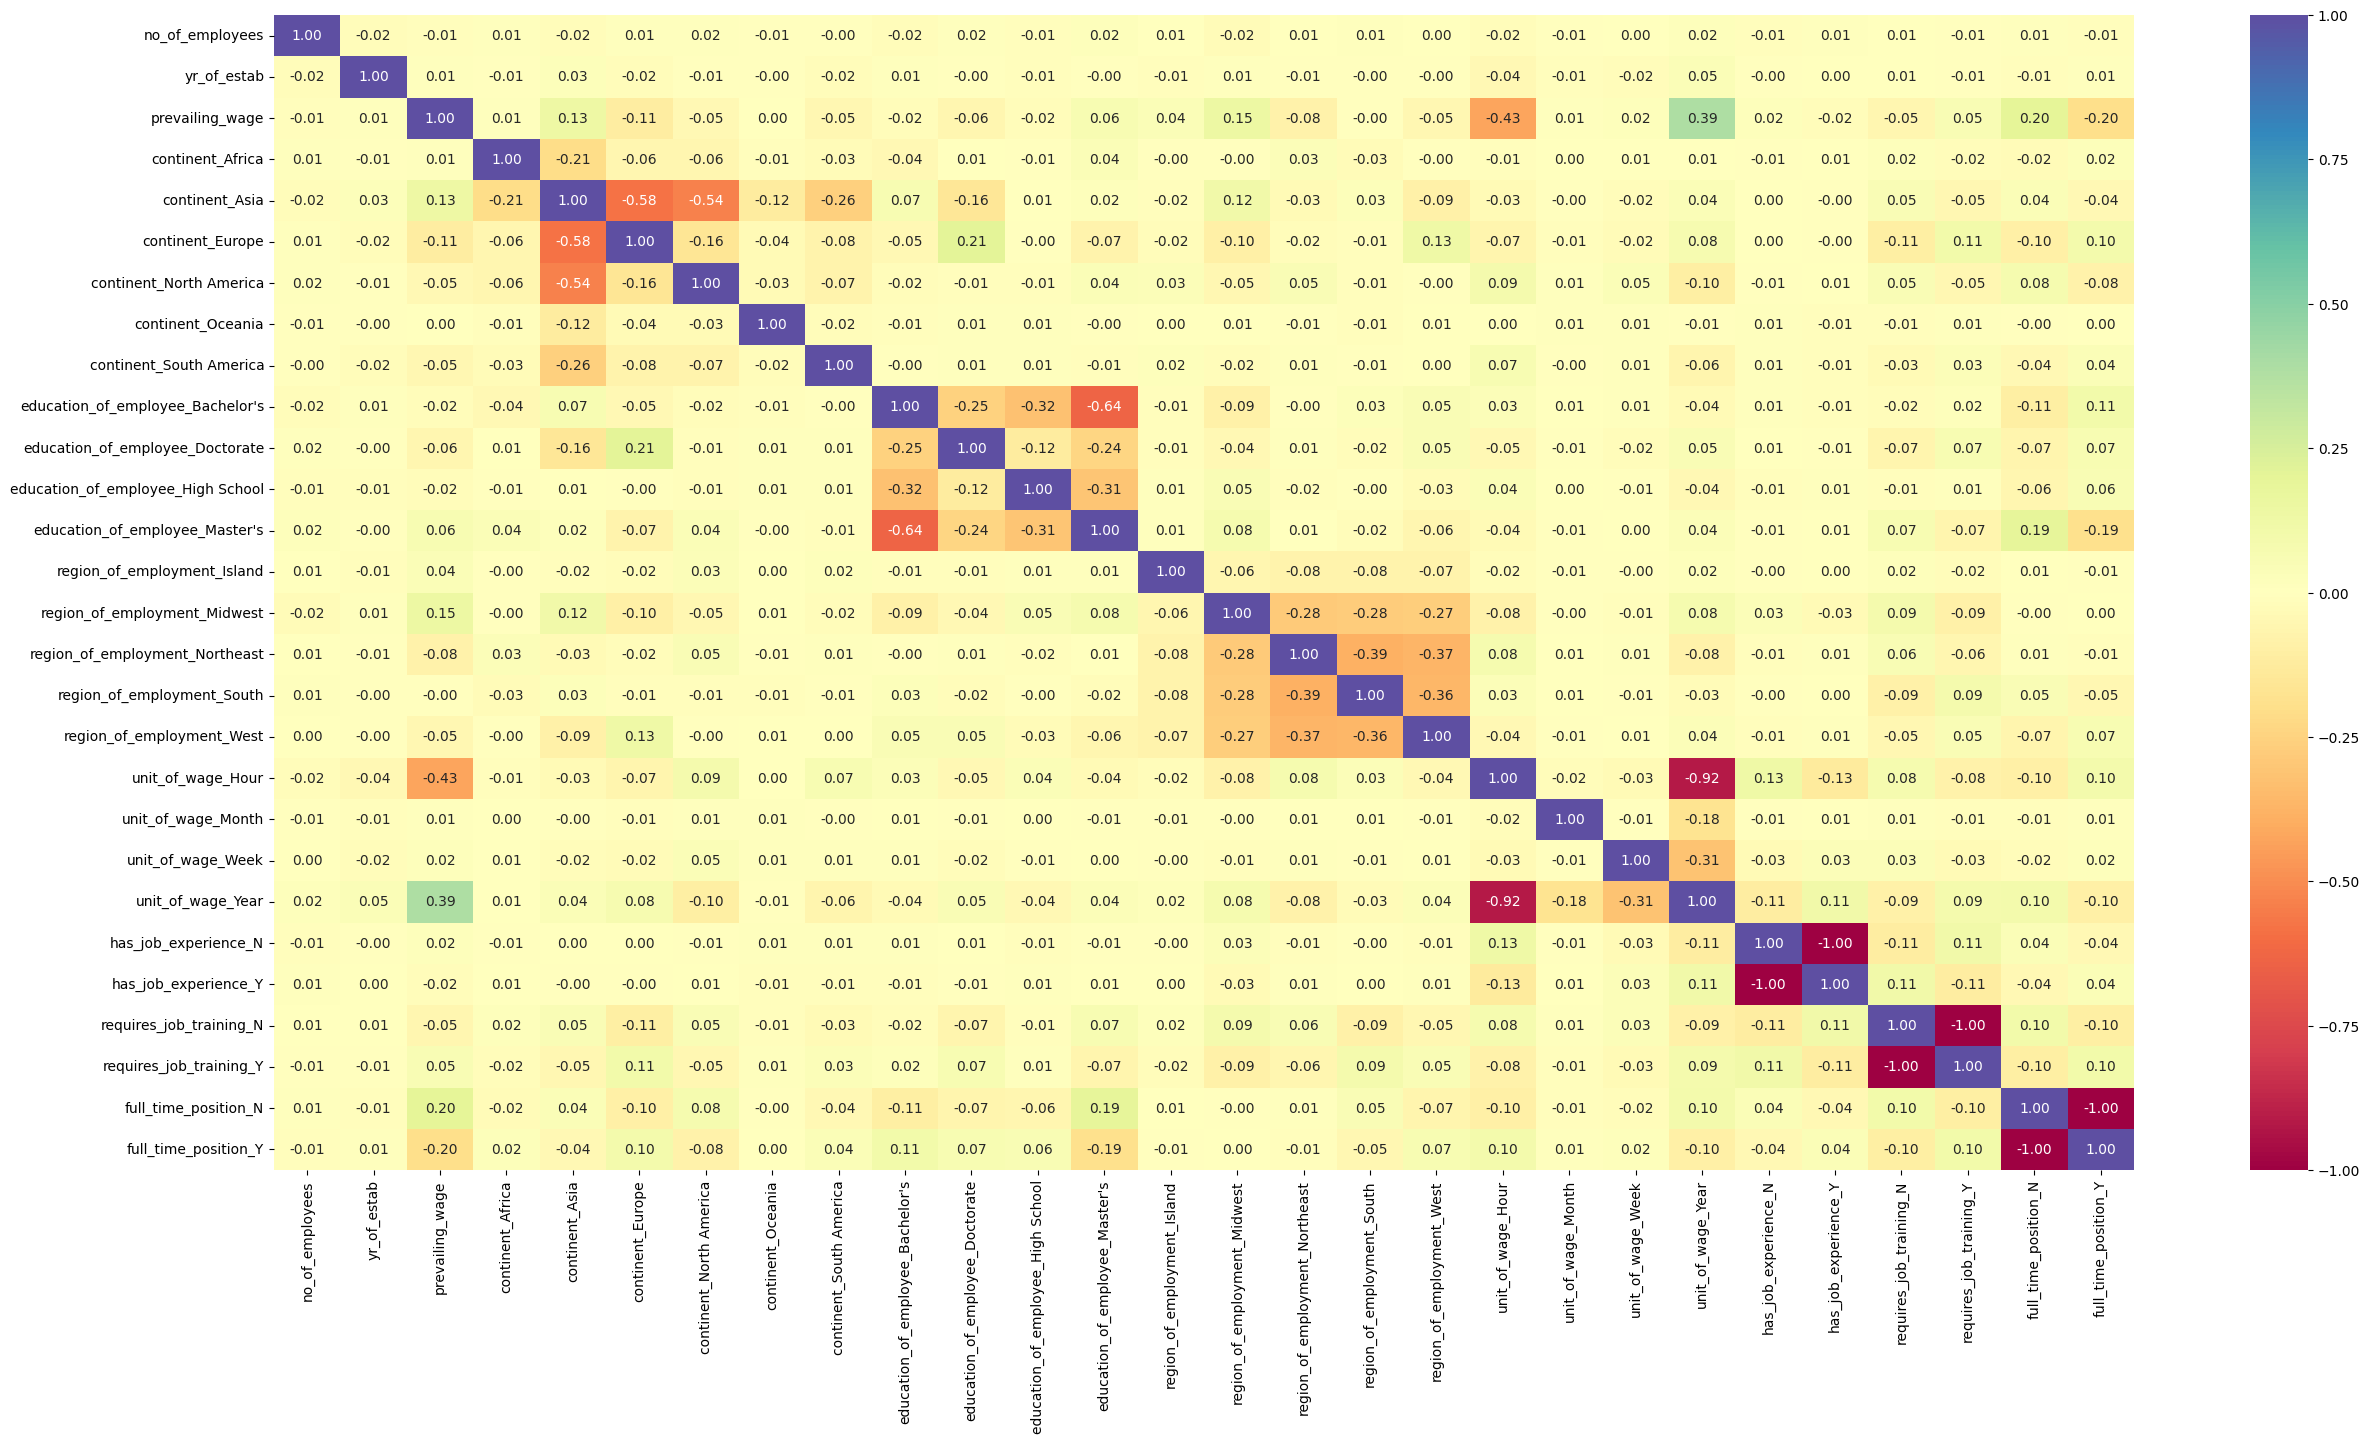

In [ ]:
num_cols = EV.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 15))
sns.heatmap(
    EV[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Model evaluation criterion

### Determining which case is more important?

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

### How to reduce the losses?

* `F1 Score` will be used as the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

## Split the data into train and test sets

In [ ]:
X = EV.drop('case_status' , axis=1)
y = EV.pop('case_status')



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

**Functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building

### Decision Tree Model

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
dTree_train=model_performance_classification_sklearn(dTree,X_train, y_train)
dTree_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

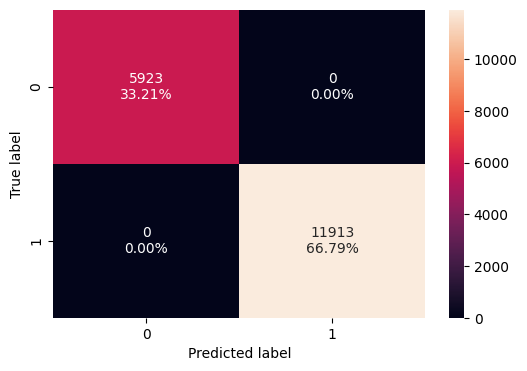

In [ ]:
confusion_matrix_sklearn(dTree, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
dTree_test=model_performance_classification_sklearn(dTree,X_test, y_test)
dTree_test

Accuracy    Recall  Precision        F1
0  0.664181  0.743976    0.75089  0.747417

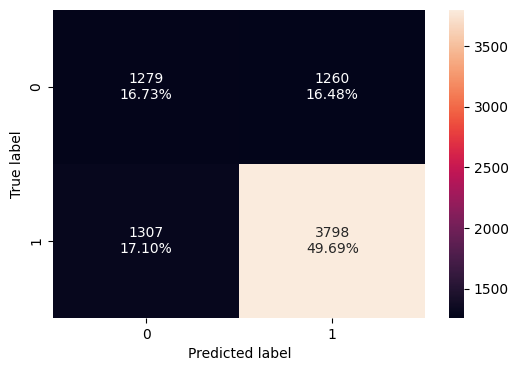

In [ ]:
confusion_matrix_sklearn(dTree,X_test, y_test)

#### Insight

 - The decision tree model is doing perfect on the training set whiles not performing well on the test set,
 _ Recording 1 for all the performance indicators while recording from a range of 0.66 to 0.75, the model is overfitting the data

#### Important features - Decision tree

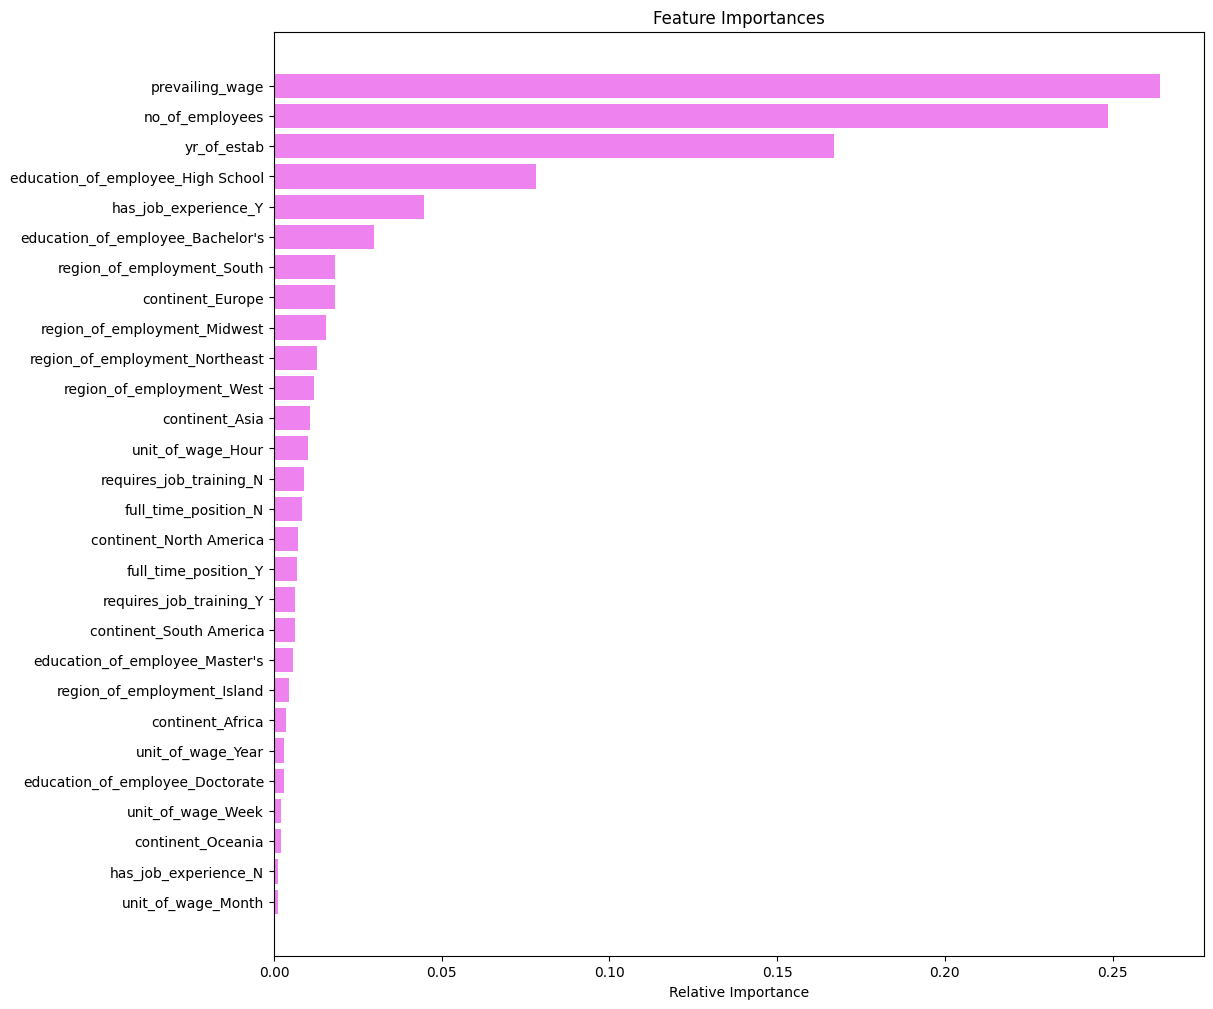

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 21, 5),
    "min_samples_leaf": [3, 5, 7, 10],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking model performance on training set

In [ ]:
dtree_estimator_train=model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_train

Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411

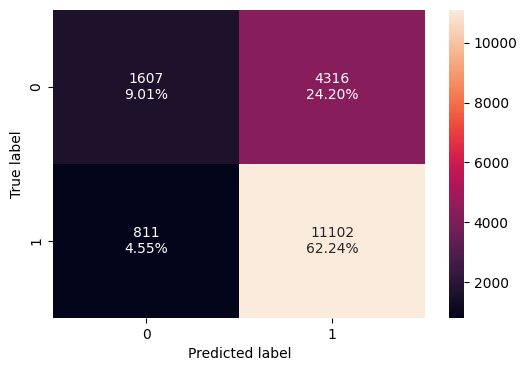

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
dtree_estimator_test=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_test

Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058

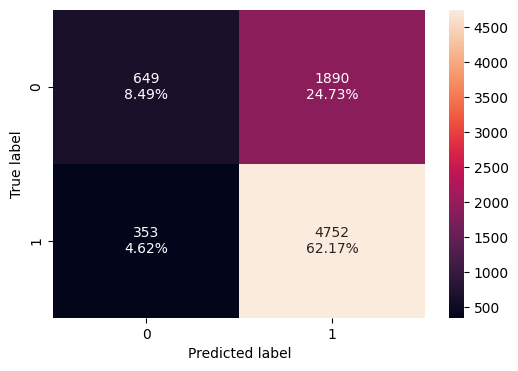

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

#### Insight

 - After hyperparameter tuning the overfitting has improved significantly as it can be observed, the difference between the training and testing performance indicators is very small

#### Important features - Decision tree after hyperparameter tuning

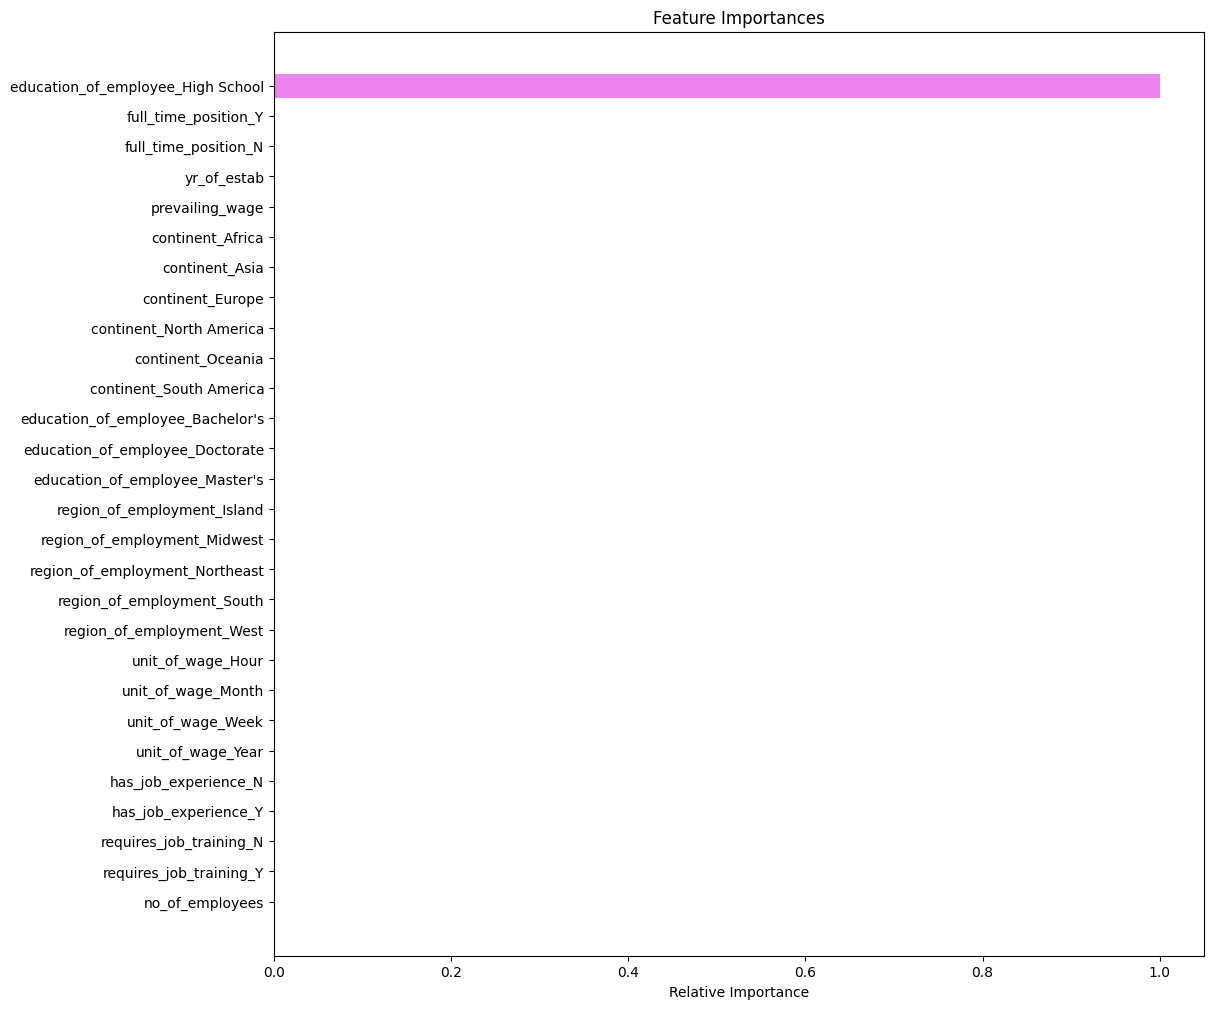

In [ ]:
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Building bagging and boosting models


- I am going to build 5 ensemble models here - Bagging Classifier, Random Forest Classifier, AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- I will first, build these models with default parameters and then use hyperparameter tuning to optimize the model performance.


### Bagging Classifier

In [ ]:
b_estimator=BaggingClassifier(random_state=1)
b_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
b_est_train=model_performance_classification_sklearn(b_estimator, X_train, y_train)
b_est_train

Accuracy    Recall  Precision        F1
0  0.983685  0.984303   0.991209  0.987744

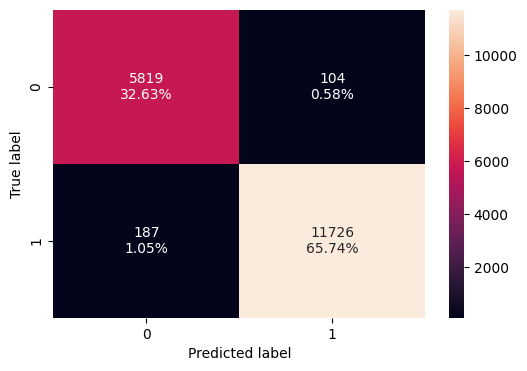

In [ ]:
confusion_matrix_sklearn(b_estimator, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
b_est_test=model_performance_classification_sklearn(b_estimator, X_test, y_test)
b_est_test

Accuracy    Recall  Precision        F1
0  0.702773  0.776102   0.778236  0.777168

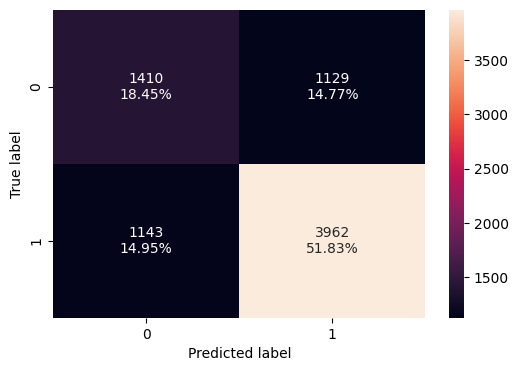

In [ ]:
confusion_matrix_sklearn(b_estimator, X_test, y_test)

#### Insight

 - The bagging classifier model is overfitting the data, recording approximately 0.21 or 20% varriance of the F1 score, between the training and testing sets


### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
b_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 121, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(b_estimator_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
b_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
b_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=120,
                  random_state=1)

#### Checking model performance on training set

In [ ]:
b_est_tuned_train=model_performance_classification_sklearn(b_estimator_tuned, X_train, y_train)
b_est_tuned_train

Accuracy    Recall  Precision        F1
0  0.994898  0.999664   0.992748  0.996194

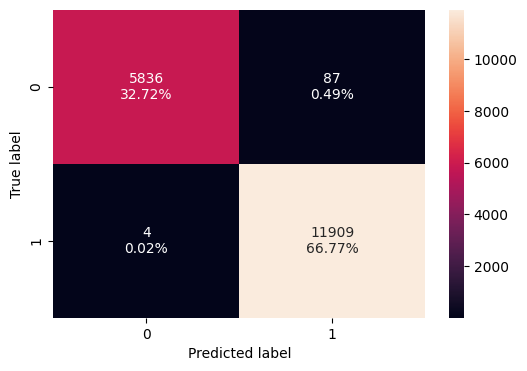

In [ ]:
confusion_matrix_sklearn(b_estimator_tuned, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
b_est_tuned_test=model_performance_classification_sklearn(b_estimator_tuned, X_test, y_test)
b_est_tuned_test

Accuracy    Recall  Precision        F1
0  0.733386  0.874045   0.761823  0.814085

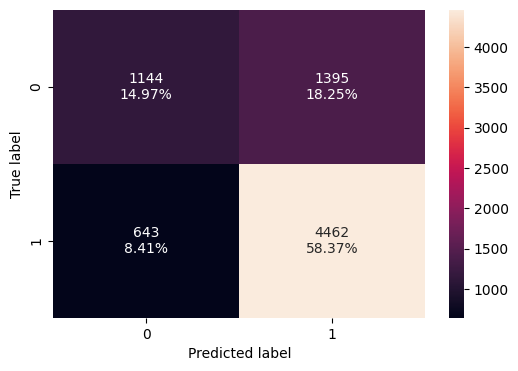

In [ ]:
confusion_matrix_sklearn(b_estimator_tuned, X_test, y_test)

#### Insight

 - The model after hyperparameter tuning improve slighly with approximate F1 score varriance between training and testing sets of 0.182 or 20% but still overfitting

### Using logistic regression as the base estimator for bagging classifier:

In [ ]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

#### Checking model performance on training set

In [ ]:
bagging_lr_train=model_performance_classification_sklearn(bagging_lr, X_train, y_train)
bagging_lr_train

Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901

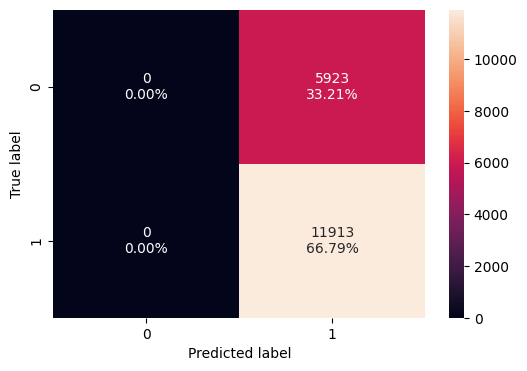

In [ ]:
confusion_matrix_sklearn(bagging_lr, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
bagging_lr_test=model_performance_classification_sklearn(bagging_lr, X_test, y_test)
bagging_lr_test

Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847

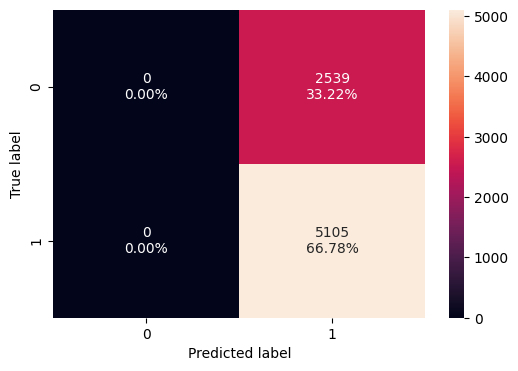

In [ ]:
confusion_matrix_sklearn(bagging_lr, X_test, y_test)

### Insights

 - The bagging classifier with logistics regresion as the base estimator is performing extremely well with almost equal performance indicators for both training and testing sets


### Random Forest Classifier

In [ ]:
rf_est=RandomForestClassifier(random_state=1)
rf_est.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
rf_est_train=model_performance_classification_sklearn(rf_est, X_train, y_train)
rf_est_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

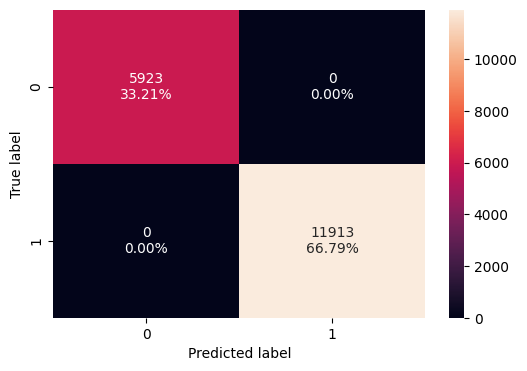

In [ ]:
confusion_matrix_sklearn(rf_est, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
rf_est_test=model_performance_classification_sklearn(rf_est, X_test, y_test)
rf_est_test

Accuracy    Recall  Precision        F1
0  0.722527  0.832713   0.770388  0.800339

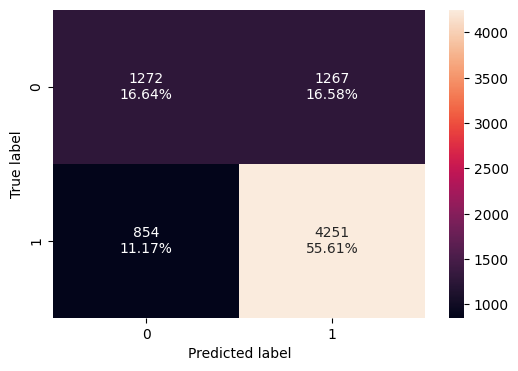

In [ ]:
confusion_matrix_sklearn(rf_est, X_test, y_test)

#### Insight

 - The Random Forest model is doing perfect on the training set whiles not performing well on the test set,
 _ Recording 1 or 100% for all the performance indicators of the training set while recording from a range of 0.722 to 0.83 of the testing set, the model is overfitting the data

#### Important features - Random Forest

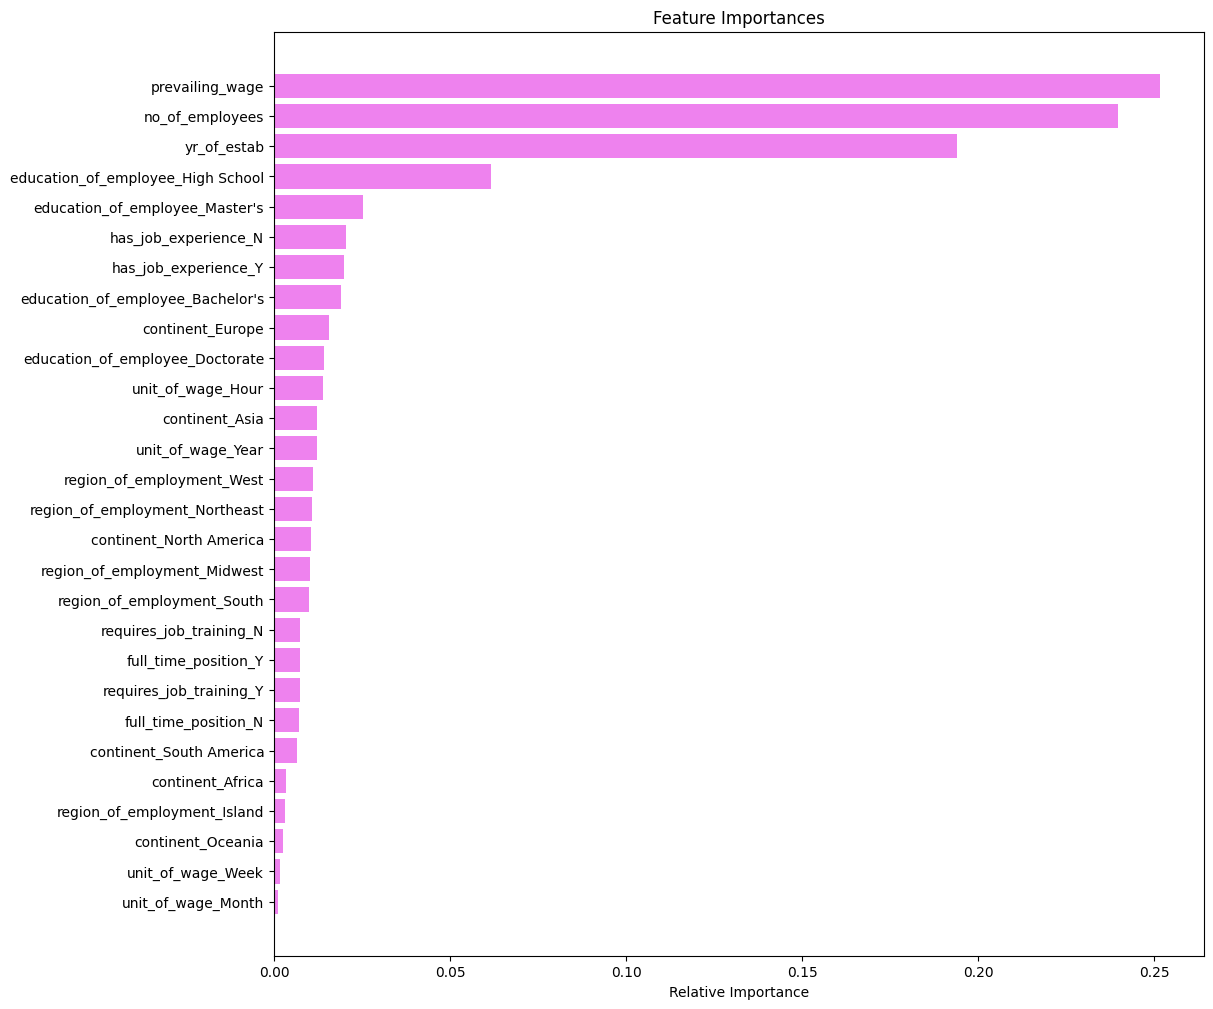

In [ ]:
importances = rf_est.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 8],
    "n_estimators": np.arange(15, 31, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=8,
                       n_estimators=25, oob_score=True, random_state=1)

#### Checking model performance on training set

In [ ]:
rf_tuned_train=model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_train

Accuracy    Recall  Precision        F1
0  0.768502  0.898598    0.78563  0.838326

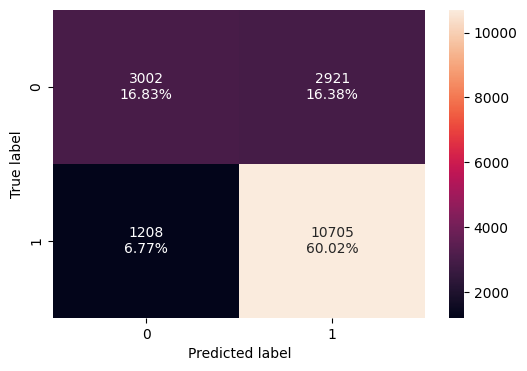

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
rf_tuned_test=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_test

Accuracy    Recall  Precision        F1
0  0.745421  0.883839   0.769309  0.822607

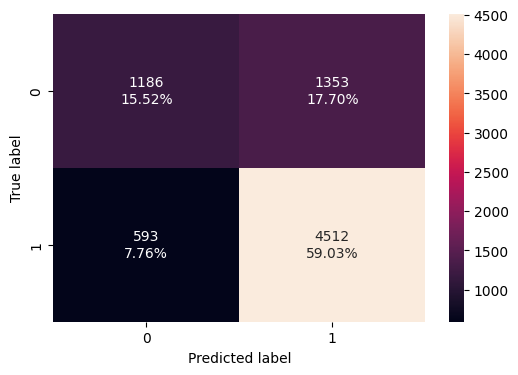

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Insights

 - After hyperparameter tuning of the Random Forest model has significantly improve on the scoring indicators, recording F1 variance of 0.0157 or 1.57% between training and testing sets compared to varriance of 0.1997 recorded in the Random forest model without hyperparameter tuning


### Checking the feature importance

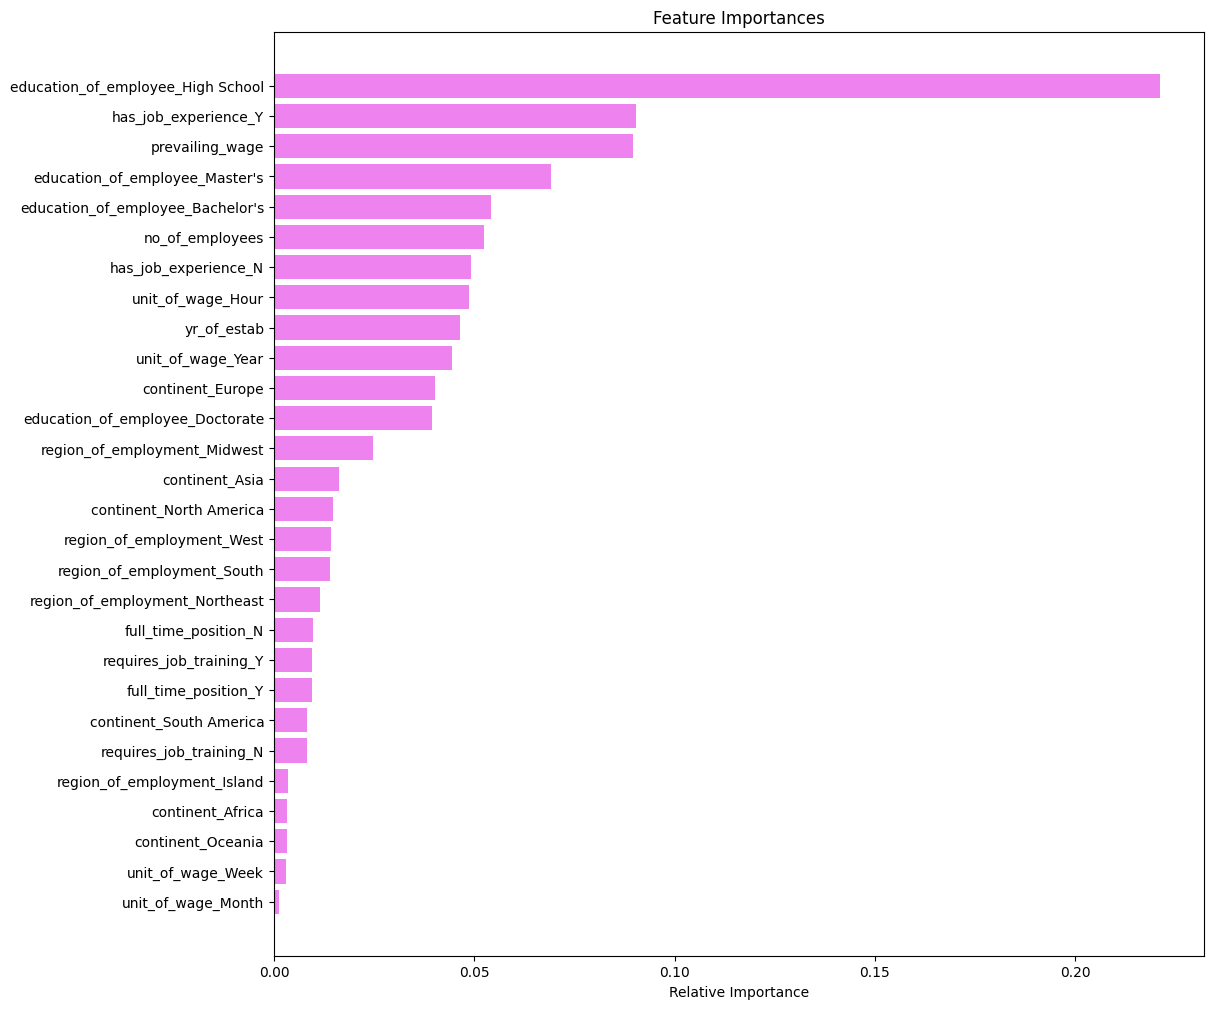

In [ ]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
abc_train=model_performance_classification_sklearn(abc, X_train, y_train)
abc_train

Accuracy    Recall  Precision       F1
0  0.738058  0.886259   0.760937  0.81883

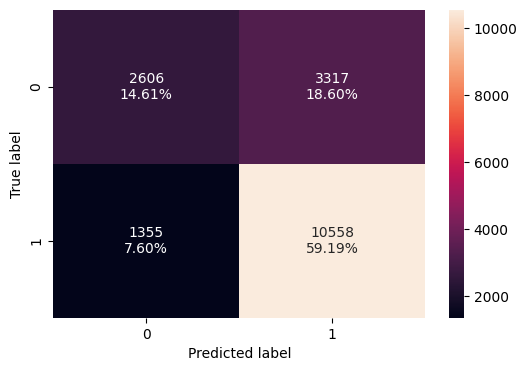

In [ ]:
confusion_matrix_sklearn(abc, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
abc_test=model_performance_classification_sklearn(abc, X_test, y_test)
abc_test

Accuracy    Recall  Precision        F1
0  0.734301  0.883252    0.75858  0.816182

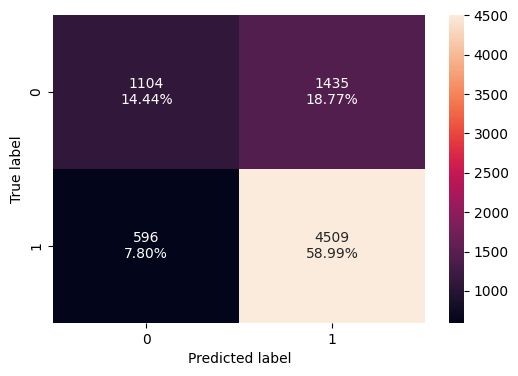

In [ ]:
confusion_matrix_sklearn(abc, X_test, y_test)

#### Insight

- The Adaboost classifier model is performing very well on both training and testing data sets, recording F1 score variance of 0.002648 or 0.26% between training and testing data sets

### Checking the feature importance

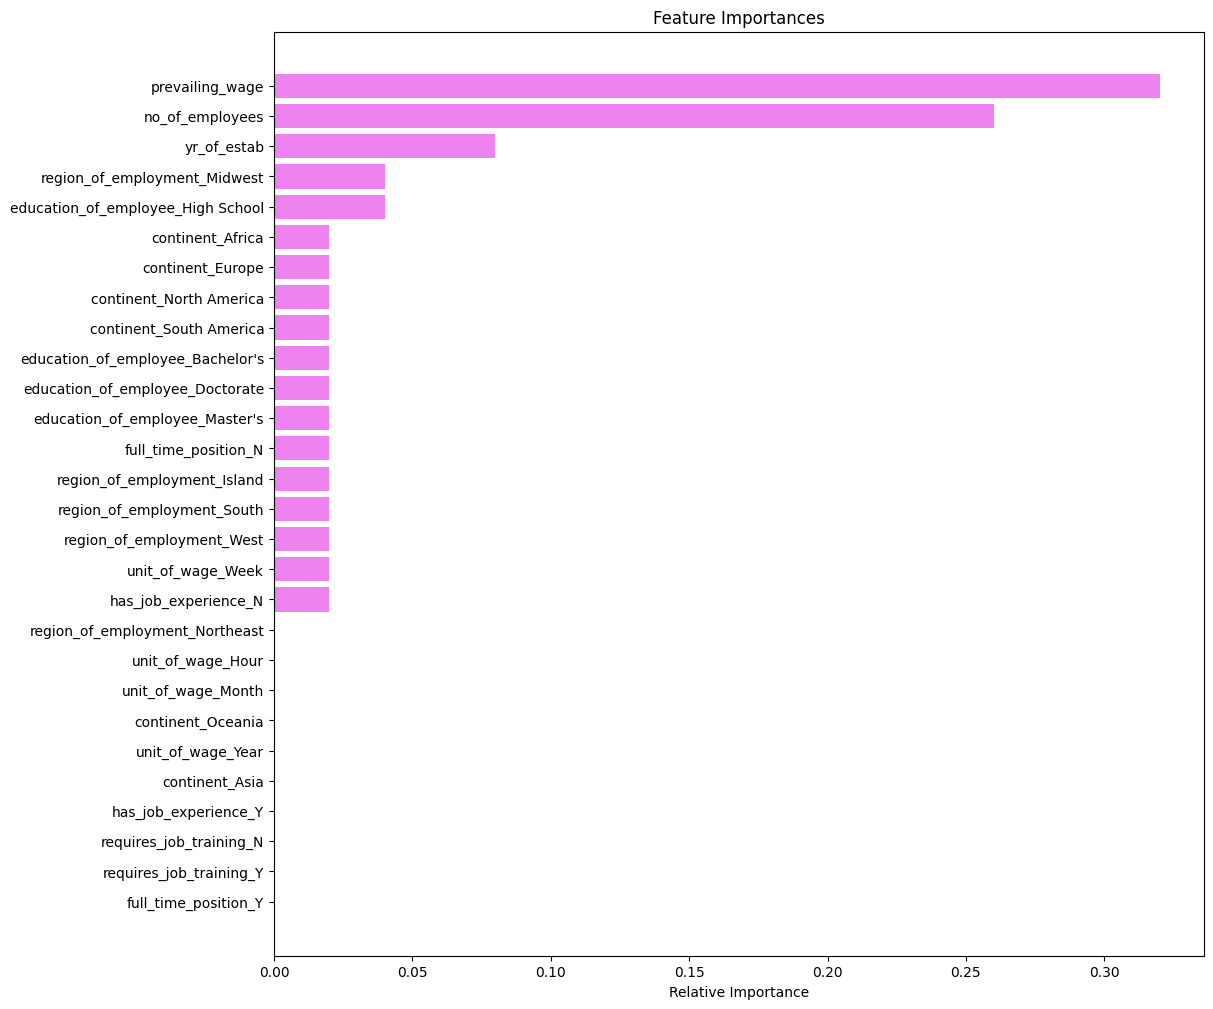

In [ ]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

In [ ]:
abc_tuned_train=model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_train

Accuracy    Recall  Precision       F1
0  0.719388  0.781835    0.79471  0.78822

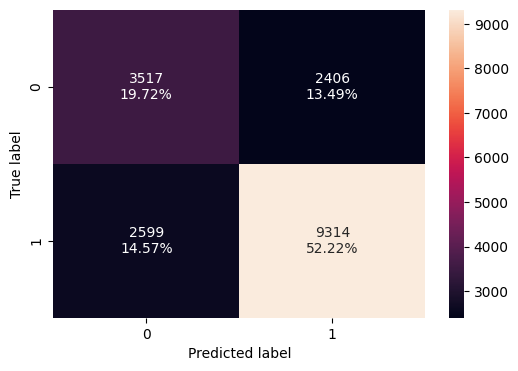

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
abc_tuned_test=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_test

Accuracy    Recall  Precision        F1
0  0.716902  0.781978   0.791592  0.786756

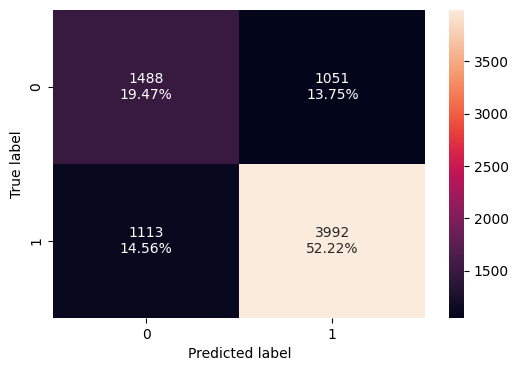

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Insights
 - After hyperparameter tuning the Adaboost classifier is still performing well on bothe training and testing data sets

### Checking the feature importance

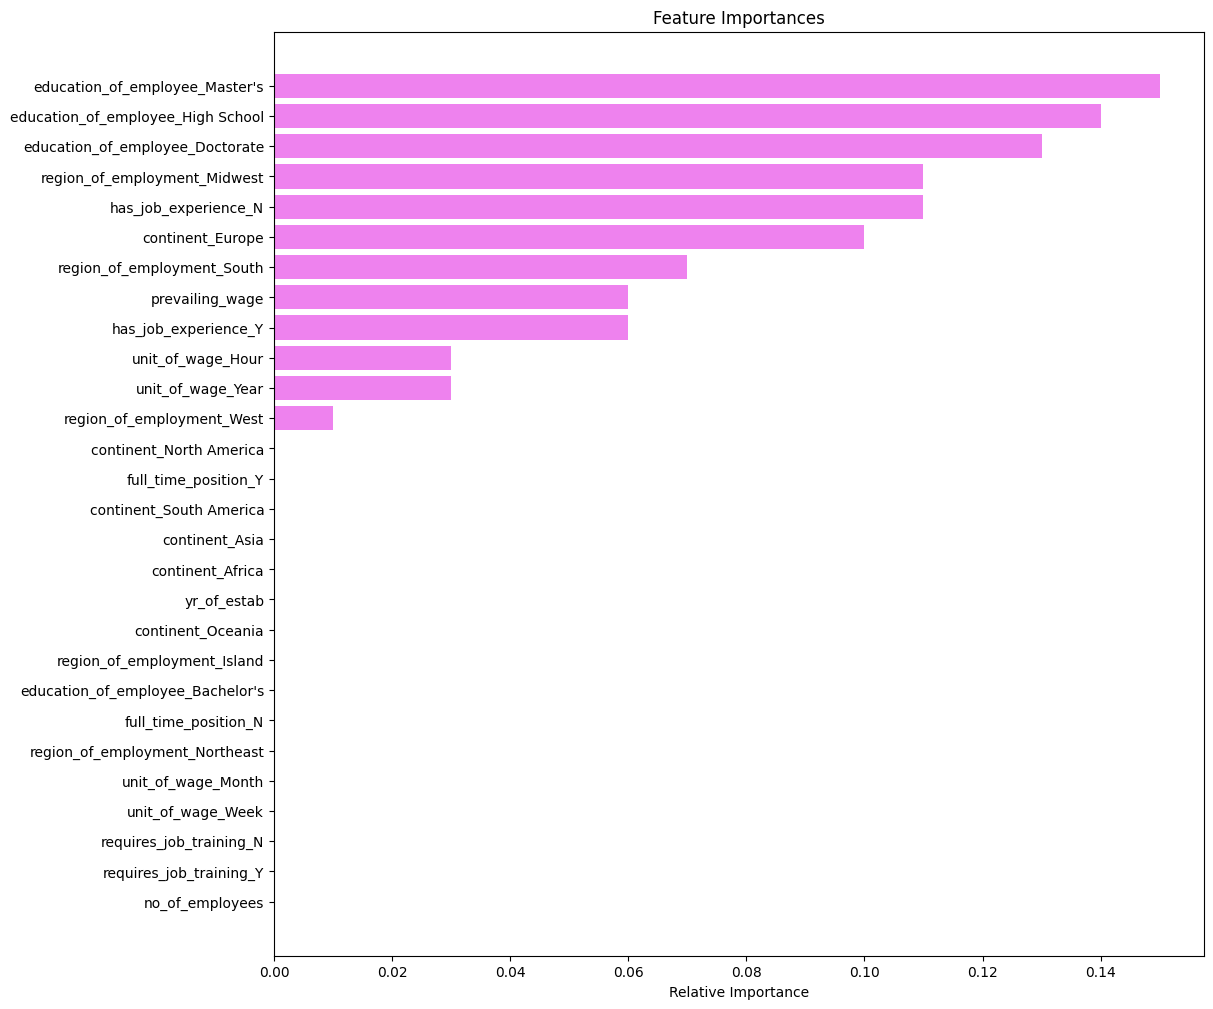

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
gbc_train=model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_train

Accuracy    Recall  Precision       F1
0  0.757849  0.883657   0.782095  0.82978

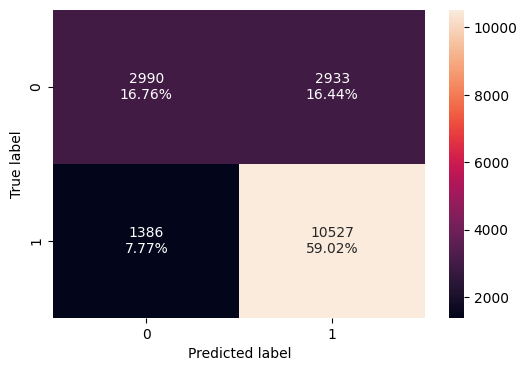

In [ ]:
confusion_matrix_sklearn(gbc, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
gbc_test=model_performance_classification_sklearn(gbc, X_test, y_test)
gbc_test

Accuracy    Recall  Precision        F1
0  0.745814  0.878355   0.772305  0.821923

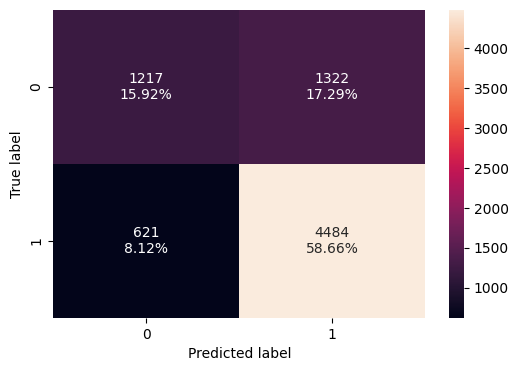

In [ ]:
confusion_matrix_sklearn(gbc, X_test, y_test)

#### Insight

- The Gredient Boosting classifier model is performing very well on both training and testing data sets, recording F1 score variance of 0.007857 or 0.79% between training and testing data sets

### Checking the feature importance

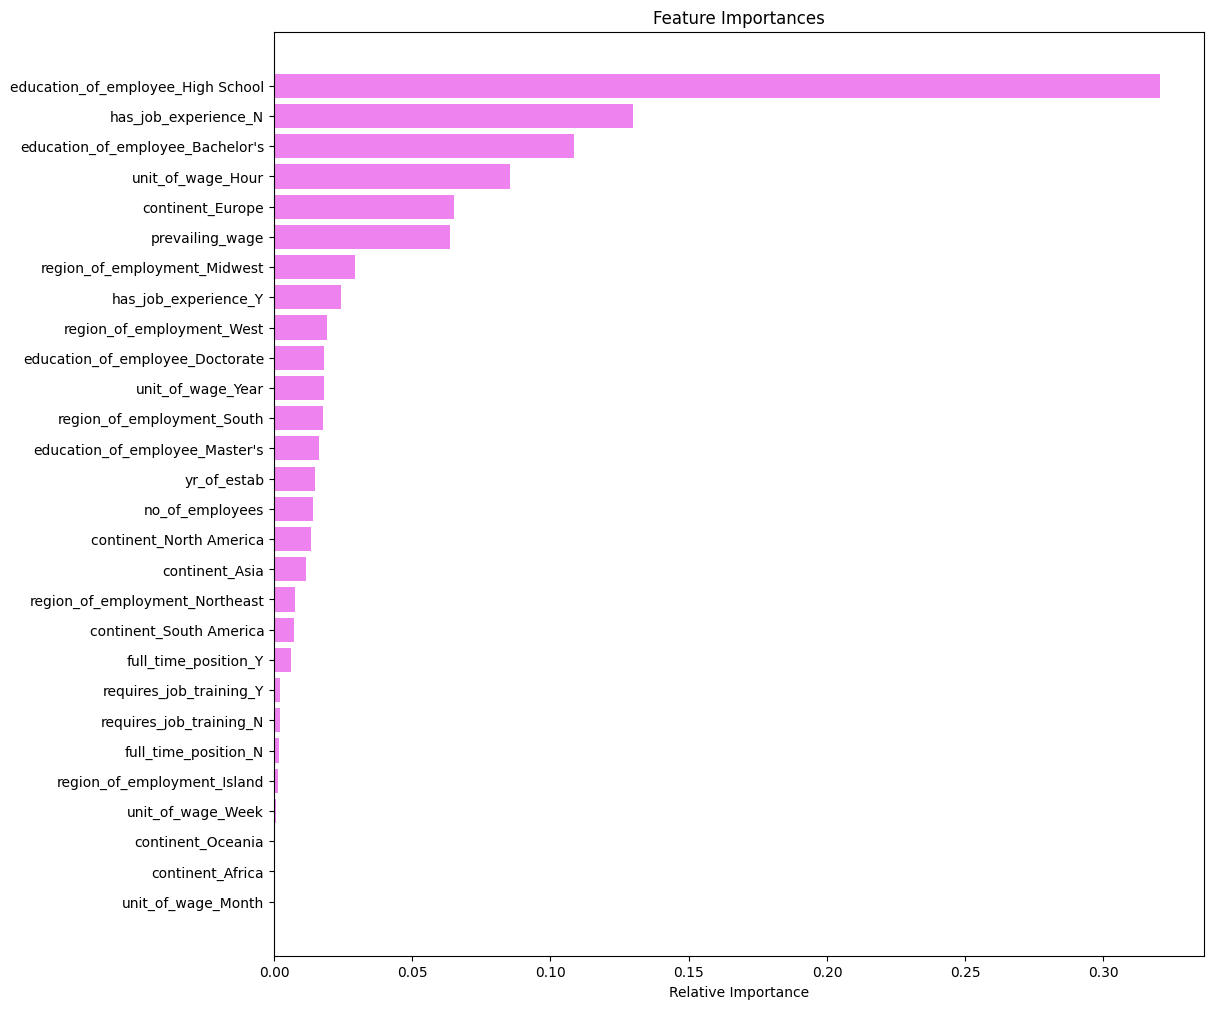

In [ ]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - Gradient Boosting Classifier

**using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150, 200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=150, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

In [ ]:
gbc_tuned_train=model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_train

Accuracy   Recall  Precision        F1
0  0.762335  0.88374   0.786728  0.832417

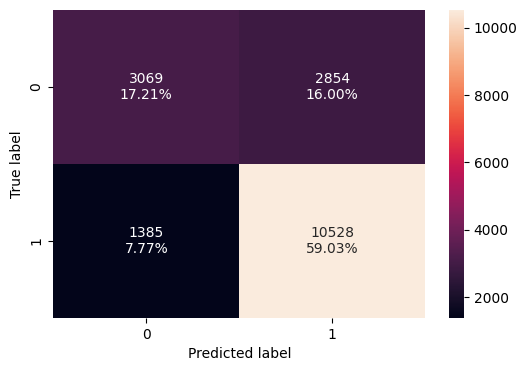

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

#### Checking model performance on test set

In [ ]:
gbc_tuned_test=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_test

Accuracy    Recall  Precision        F1
0  0.747253  0.876004   0.774909  0.822361

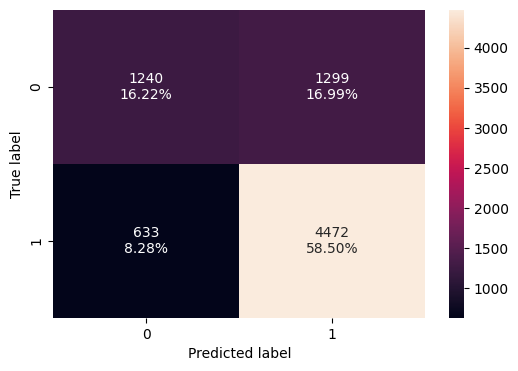

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

#### Insight

- The Gredient Boosting classifier model is still performing very well on both training and testing data sets after hyperparameter tuning, recording F1 score variance of 0.01 or 1% between training and testing data sets

### Checking the feature importance

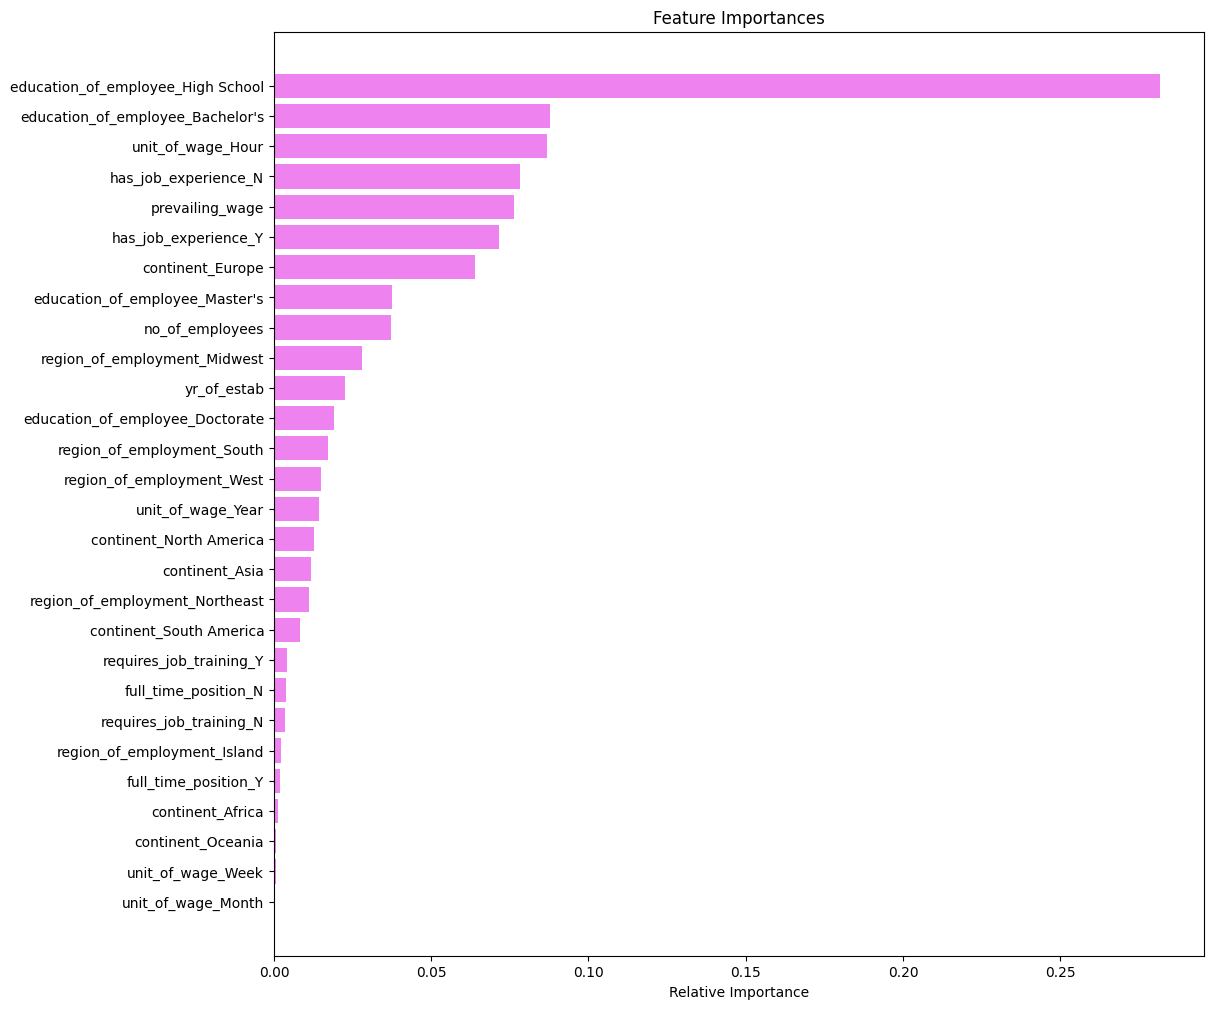

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

In [ ]:
xgb_train=model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_train

Accuracy    Recall  Precision        F1
0  0.832866  0.931252   0.836904  0.881561

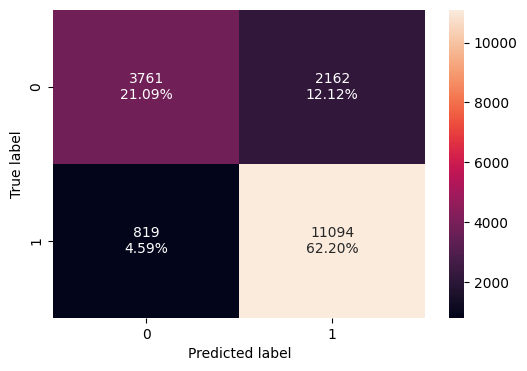

In [ ]:
confusion_matrix_sklearn(xgb, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
xgb_test=model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_test

Accuracy    Recall  Precision        F1
0  0.733909  0.862488   0.767742  0.812362

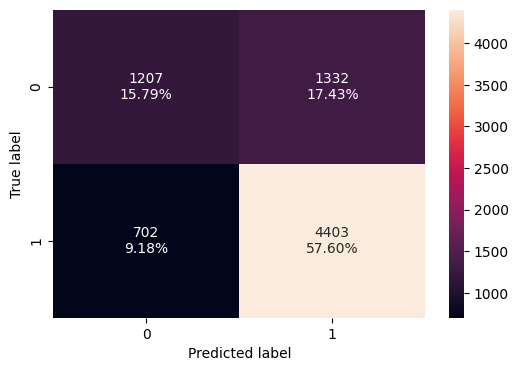

In [ ]:
confusion_matrix_sklearn(xgb, X_test, y_test)

#### Insight

- The XGBoost Classifier model is slightly overfitting the data sets, recording F1 score variance of 0.069 or 6.9% between training and testing data sets

### Checking the feature importance

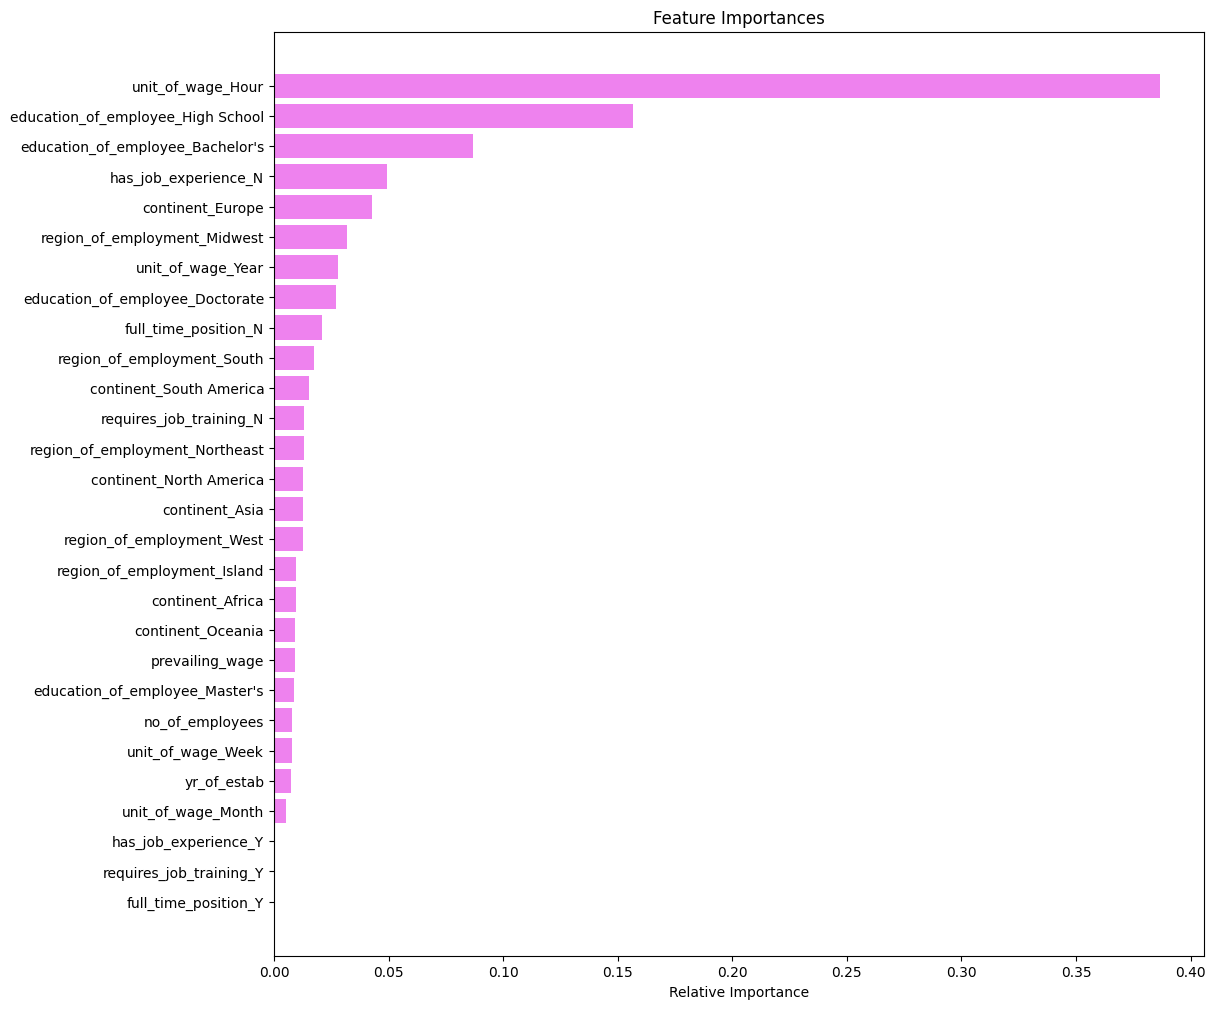

In [ ]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2, 4],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

#### Checking model performance on training set

In [ ]:
xgb_tuned_train=model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_train

Accuracy   Recall  Precision        F1
0  0.766259  0.88374   0.790865  0.834727

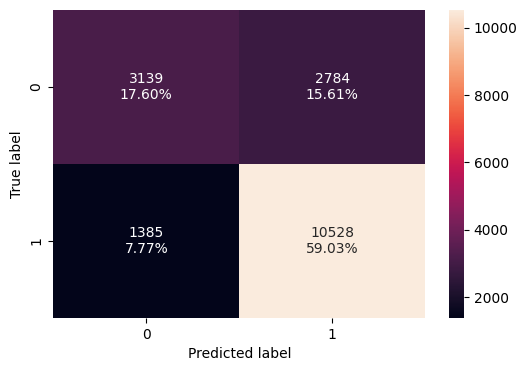

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
xgb_tuned_test=model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_test

Accuracy    Recall  Precision        F1
0  0.747645  0.872674   0.776945  0.822032

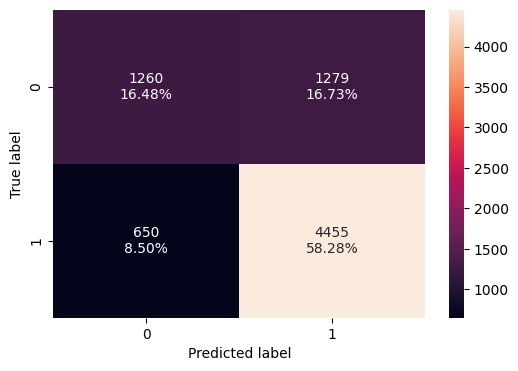

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

### Insights

 - The XGBoost Classifier model is significantly improved after hyperparameter tuning, recording F1 score variance of 0.012695 or 1.3% between training and testing data sets

### Checking the feature importance

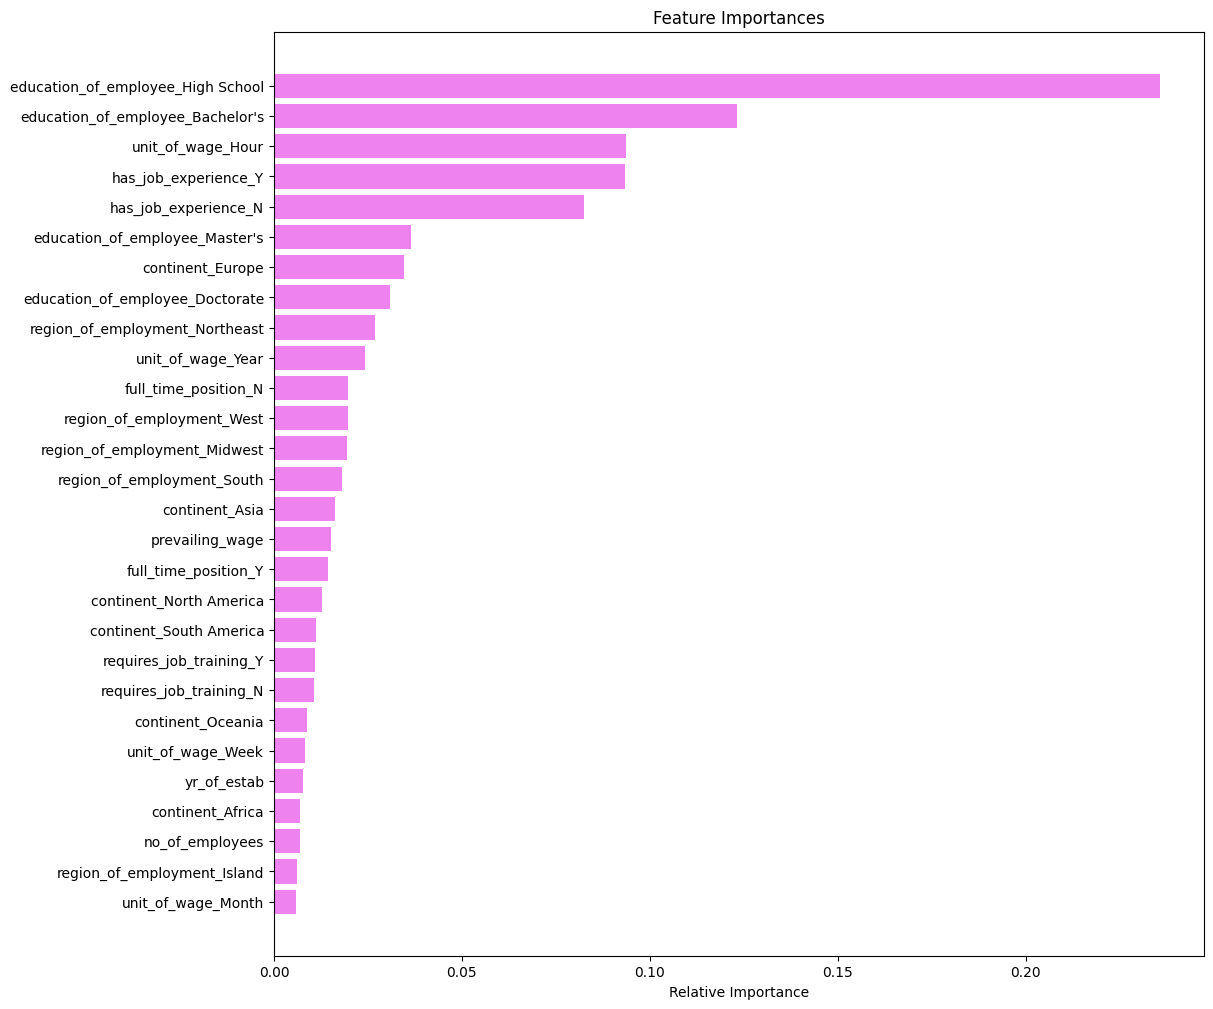

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Checking balance is the most important feature as per XGBoost model unlike AdaBoost and Gradient Boosting, where the most important feature is the amount.

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_Clas=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5, n_jobs=-1)
stacking_Clas.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=150,
                                                           random_state=1,
                                                           subsa...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...),
                   n_jobs=-1)

#### Checking model performance on training set

In [ ]:
stacking_Clas_train=model_performance_classification_sklearn(stacking_Clas, X_train, y_train)
stacking_Clas_train

Accuracy    Recall  Precision        F1
0  0.768222  0.879627   0.795129  0.835246

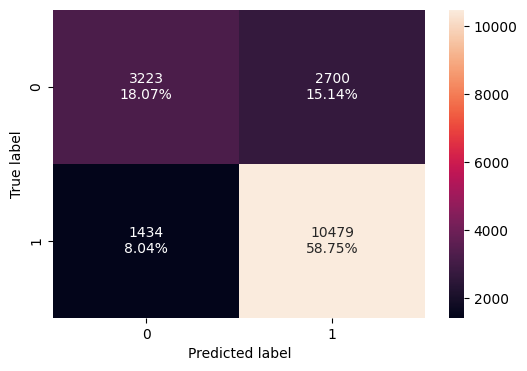

In [ ]:
confusion_matrix_sklearn(stacking_Clas, X_train, y_train)

#### Checking model performance on testing set

In [ ]:
stacking_Clas_test=model_performance_classification_sklearn(stacking_Clas, X_test, y_test)
stacking_Clas_test

Accuracy    Recall  Precision        F1
0  0.744767  0.865034   0.777739  0.819067

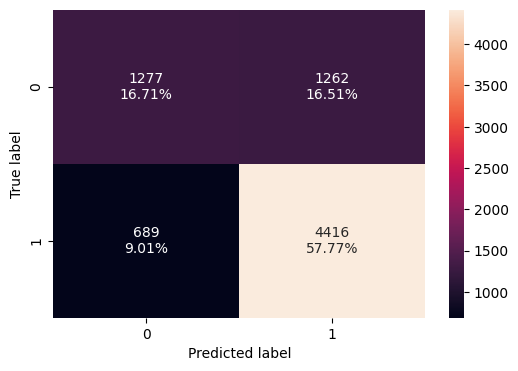

In [ ]:
confusion_matrix_sklearn(stacking_Clas, X_test, y_test)

#### Insight

- The Stacking Classifier model is slightly performing well on the data sets, recording F1 score variance of 0.016179 or 1.62% between training and testing data sets

##  Will tuning the hyperparameters improve the model performance?

 - In general it was observed that scorring indicators improve after hyperparameter tuning

## Model Performance Comparison and Final Model Selection

In [ ]:
# training and testing performance comparison

models_train_comp_df = pd.concat(
    [
        dTree_train.T,
        dtree_estimator_train.T,
        b_est_train.T,
        b_est_tuned_train.T,
        bagging_lr_train.T,
        rf_est_train.T,
        rf_tuned_train.T,
        abc_train.T,
        abc_tuned_train.T,
        gbc_train.T,
        gbc_tuned_train.T,
        xgb_train.T,
        xgb_tuned_train.T,
        stacking_Clas_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Bagging logistic regression base",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

models_test_comp_df = pd.concat(
    [
        dTree_test.T,
        dtree_estimator_test.T,
        b_est_test.T,
        b_est_tuned_test.T,
        bagging_lr_test.T,
        rf_est_test.T,
        rf_tuned_test.T,
        abc_test.T,
        abc_tuned_test.T,
        gbc_test.T,
        gbc_tuned_test.T,
        xgb_test.T,
        xgb_tuned_test.T,
        stacking_Clas_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Bagging logistic regression base",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]



In [ ]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Tuned Decision Tree  Bagging Classifier  \
Accuracy             1.0             0.712548            0.983685   
Recall               1.0             0.931923            0.984303   
Precision            1.0             0.720067            0.991209   
F1                   1.0             0.812411            0.987744   

           Tuned Bagging Classifier  Bagging logistic regression base  \
Accuracy                   0.994898                          0.667919   
Recall                     0.999664                          1.000000   
Precision                  0.992748                          0.667919   
F1                         0.996194                          0.800901   

           Random Forest  Tuned Random Forest  Adaboost Classifier  \
Accuracy             1.0             0.768502             0.738058   
Recall               1.0             0.898598             0.886259   
Precision            1.0             0.785630             0.760937   
F1                   1.0             0.838326             0.818830   

           Tuned Adaboost Classifier  Gradient Boost Classifier  \
Accuracy                    0.719388                   0.757849   
Recall                      0.781835                   0.883657   
Precision                   0.794710                   0.782095   
F1                          0.788220                   0.829780   

           Tuned Gradient Boost Classifier  XGBoost Classifier  \
Accuracy                          0.762335            0.832866   
Recall                            0.883740            0.931252   
Precision                         0.786728            0.836904   
F1                                0.832417            0.881561   

           XGBoost Classifier Tuned  Stacking Classifier  
Accuracy                   0.766259             0.768222  
Recall                     0.883740             0.879627  
Precision                  0.790865             0.795129  
F1                         0.834727             0.835246

In [ ]:

print("Testing performance comparison:")
models_test_comp_df



Testing performance comparison:


Decision Tree  Tuned Decision Tree  Bagging Classifier  \
Accuracy        0.664181             0.706567            0.702773   
Recall          0.743976             0.930852            0.776102   
Precision       0.750890             0.715447            0.778236   
F1              0.747417             0.809058            0.777168   

           Tuned Bagging Classifier  Bagging logistic regression base  \
Accuracy                   0.733386                          0.667844   
Recall                     0.874045                          1.000000   
Precision                  0.761823                          0.667844   
F1                         0.814085                          0.800847   

           Random Forest  Tuned Random Forest  Adaboost Classifier  \
Accuracy        0.722527             0.745421             0.734301   
Recall          0.832713             0.883839             0.883252   
Precision       0.770388             0.769309             0.758580   
F1              0.800339             0.822607             0.816182   

           Tuned Adaboost Classifier  Gradient Boost Classifier  \
Accuracy                    0.716902                   0.745814   
Recall                      0.781978                   0.878355   
Precision                   0.791592                   0.772305   
F1                          0.786756                   0.821923   

           Tuned Gradient Boost Classifier  XGBoost Classifier  \
Accuracy                          0.747253            0.733909   
Recall                            0.876004            0.862488   
Precision                         0.774909            0.767742   
F1                                0.822361            0.812362   

           XGBoost Classifier Tuned  Stacking Classifier  
Accuracy                   0.747645             0.744767  
Recall                     0.872674             0.865034  
Precision                  0.776945             0.777739  
F1                         0.822032             0.819067

 - using the F1 score, the Gradient Boosting Classifier is the best performing model
 - The F1 score for the training set is 0.829780 and the F1 score for the testing score is 0.821923 and recording the lowest varriance of 0.007857

### Important features of the final model

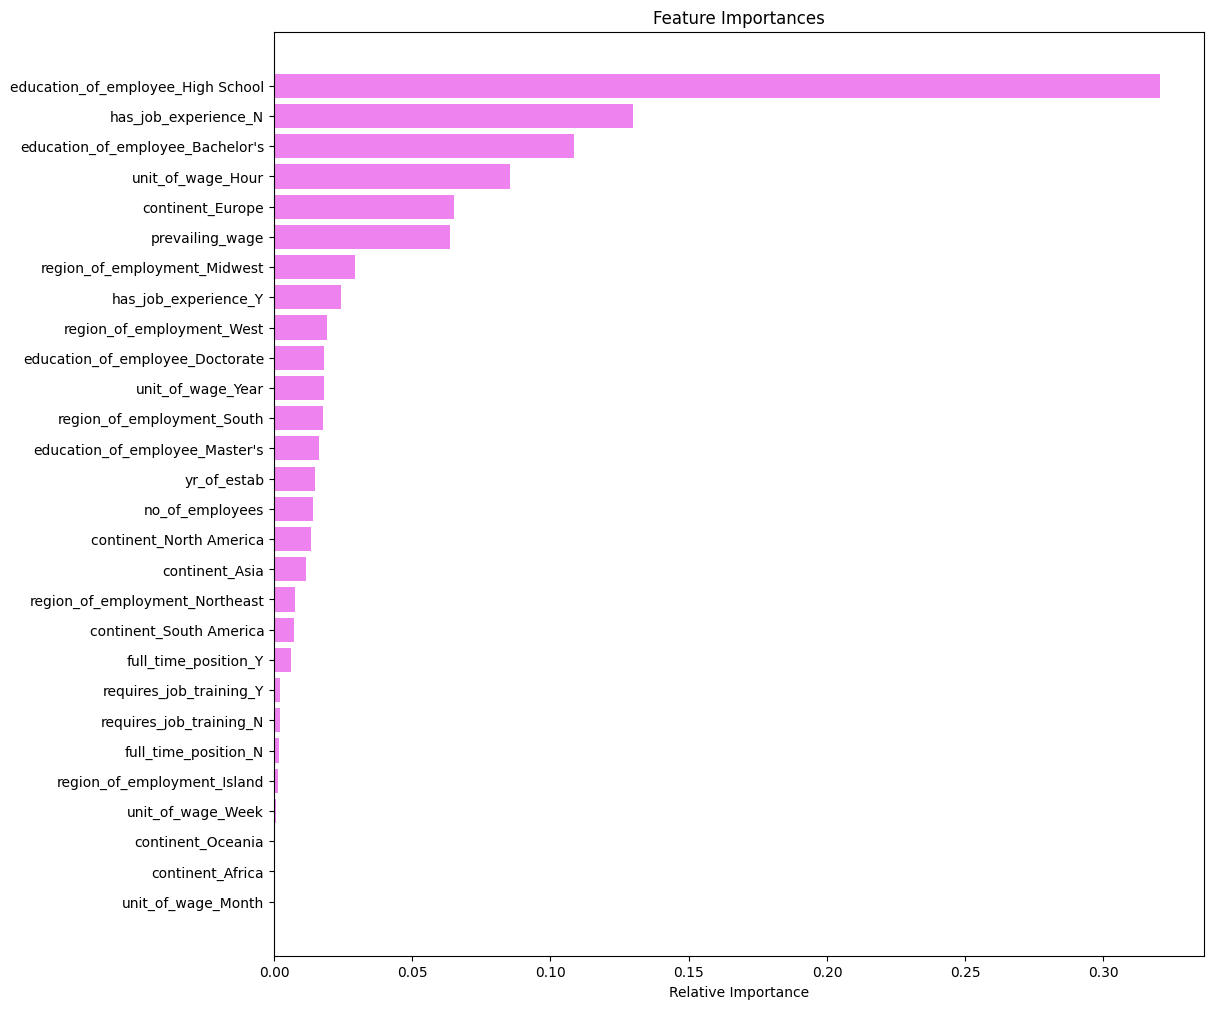

In [ ]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

 - The top 3 most important features in determining certification of Visas are employees with high school education, employees with no job experience and employees with bachelor's education

## Actionable Insights and Recommendations

 - With F1 score of 0.821923 on the testing set and 0.829780 on the training set, the is a very high score that makes the good for prediction.
 - Greater the F1 score higher are the chances of minimizing False Negatives and False Positives

### Recommendations

 - Per the data it was observed that very few employees were with Doctorate and Masters, maybe the higher the level of education the lower the interest in seeking job abroad, more incentive could be given to attract them

 - The most import features for the visa determinations can be explained to the employers to enable them do pre-screening before engagement, this will avoid the situation of spending to interview and engage, only to be denied the visa.
